# Analyzing Tech Salaries: Insights for Programmers

## Introduction

In the ever-expanding field of technology, understanding salary trends and their driving factors is crucial for professionals and companies alike. This project explores a dataset of tech salaries, focusing on uncovering patterns and insights through advanced data analysis techniques.

The dataset includes attributes such as geographic location, years of experience, employer-specific tenure, and annual base pay. By applying dimensionality reduction methods like PCA, t-SNE, MDS, and clustering algorithms like K-Means, DBSCAN, and GMM, this study aims to provide a programmer-centric perspective on the dynamics of compensation in the tech industry.

The objective is to extract actionable insights that can inform programming professionals about trends in salaries, highlight regional disparities, and identify the factors contributing most significantly to compensation. This exploration also serves as a demonstration of how modern machine learning techniques can be applied to real-world data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from pathlib import Path
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [3]:
file_path = Path('salaries_clean.csv')

In [5]:
df = pd.read_csv(file_path)
df

index  salary_id                employer_name      location_name  \
0         0          1                       opower  san francisco, ca   
1         1          3                      walmart    bentonville, ar   
2         2          4           vertical knowledge      cleveland, oh   
3         3          6                       netapp            waltham   
4         4         12                        apple          cupertino   
...     ...        ...                          ...                ...   
1650   1650       3289         sparkfun electronics        boulder, co   
1651   1651       3290                        intel             europe   
1652   1652       3293  $2bn valuation tech company                nyc   
1653   1653       3294                  of maryland   college park, md   
1654   1654       3298                     linkedin          sunnyvale   

     location_state location_country  location_latitude  location_longitude  \
0                CA               US              37.77             -122.41   
1                AR               US              36.36              -94.20   
2                OH               US              41.47              -81.67   
3               NaN              NaN                NaN                 NaN   
4               NaN              NaN                NaN                 NaN   
...             ...              ...                ...                 ...   
1650             CO               US              40.02             -105.25   
1651            NaN              NaN                NaN                 NaN   
1652            NaN              NaN                NaN                 NaN   
1653             MD               US              38.99              -76.93   
1654            NaN              NaN                NaN                 NaN   

                                              job_title job_title_category  \
0                                      systems engineer        Engineering   
1                                      senior developer           Software   
2                                     software engineer           Software   
3                                                   mts              Other   
4                                     software engineer           Software   
...                                                 ...                ...   
1650                          junior software developer           Software   
1651                             staff software enginer           Software   
1652                                   sr. frontend eng                Web   
1653  scientific programmer (faculty research assist...    Applied Science   
1654                          business analytics intern              Other   

     job_title_rank  total_experience_years  employer_experience_years  \
0               NaN                    13.0                        2.0   
1            Senior                    15.0                        8.0   
2               NaN                     4.0                        1.0   
3               NaN                     4.0                        0.0   
4               NaN                     4.0                        3.0   
...             ...                     ...                        ...   
1650         Junior                     1.0                        0.5   
1651            NaN                     6.0                        4.0   
1652         Senior                     7.0                        1.0   
1653            NaN                     5.0                        1.0   
1654         Intern                     2.0                        0.0   

      annual_base_pay  signing_bonus  annual_bonus stock_value_bonus  \
0            125000.0         5000.0           0.0       5000 shares   
1             65000.0            NaN        5000.0             3,000   
2             86000.0         5000.0        6000.0                 0   
3            105000.0         5000.0        8500.0    

In [7]:
df.describe()

index    salary_id  location_latitude  location_longitude  \
count  1655.000000  1655.000000         792.000000          792.000000   
mean    827.000000  1684.100906          37.754394          -64.712273   
std     477.901664   932.901390          16.740905           67.090364   
min       0.000000     1.000000         -41.000000         -123.270000   
25%     413.500000   897.000000          37.410000         -102.702500   
50%     827.000000  1711.000000          38.580000          -95.000000   
75%    1240.500000  2477.000000          45.440000          -64.562500   
max    1654.000000  3298.000000          65.000000          174.000000   

       total_experience_years  employer_experience_years  annual_base_pay  \
count             1608.000000                1608.000000     1.651000e+03   
mean                 6.756113                   2.656163     6.325004e+06   
std                  5.687004                   3.301834     2.461353e+08   
min                  0.000000                   0.000000     0.000000e+00   
25%                  3.000000                   1.000000     6.100000e+04   
50%                  5.000000                   2.000000     9.948000e+04   
75%                 10.000000                   3.000000     1.300000e+05   
max                 56.000000                  58.000000     1.000000e+10   

       signing_bonus  annual_bonus  
count   1.332000e+03  1.336000e+03  
mean    2.240563e+04  1.177552e+04  
std     3.097990e+05  6.921569e+04  
min     0.000000e+00  0.000000e+00  
25%     0.000000e+00  0.000000e+00  
50%     0.000000e+00  5.000000e+02  
75%     5.000000e+03  1.000000e+04  
max     8.999999e+06  2.000000e+06

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      1655 non-null   int64  
 1   salary_id                  1655 non-null   int64  
 2   employer_name              1651 non-null   object 
 3   location_name              1655 non-null   object 
 4   location_state             558 non-null    object 
 5   location_country           792 non-null    object 
 6   location_latitude          792 non-null    float64
 7   location_longitude         792 non-null    float64
 8   job_title                  1655 non-null   object 
 9   job_title_category         1655 non-null   object 
 10  job_title_rank             425 non-null    object 
 11  total_experience_years     1608 non-null   float64
 12  employer_experience_years  1608 non-null   float64
 13  annual_base_pay            1651 non-null   float

In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Columns:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")
    break


Unique Values in Categorical Columns:
employer_name: ['opower' 'walmart' 'vertical knowledge' ... 'sparkfun electronics'
 '$2bn valuation tech company' 'of maryland']


In [13]:
missing_values = df.isnull().sum()
missing_values

index                           0
salary_id                       0
employer_name                   4
location_name                   0
location_state               1097
location_country              863
location_latitude             863
location_longitude            863
job_title                       0
job_title_category              0
job_title_rank               1230
total_experience_years         47
employer_experience_years      47
annual_base_pay                 4
signing_bonus                 323
annual_bonus                  319
stock_value_bonus             409
comments                     1363
submitted_at                    0
dtype: int64

In [15]:
missing_columns = missing_values[missing_values > 0]
if missing_columns.empty:
    print("No missing values in the dataset.")
else:
    print("Columns with missing values:")
    print(missing_columns)

Columns with missing values:
employer_name                   4
location_state               1097
location_country              863
location_latitude             863
location_longitude            863
job_title_rank               1230
total_experience_years         47
employer_experience_years      47
annual_base_pay                 4
signing_bonus                 323
annual_bonus                  319
stock_value_bonus             409
comments                     1363
dtype: int64


In [6]:
# plt.figure(figsize=(12, 6))
# sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
# plt.title("Heatmap of Missing Values")

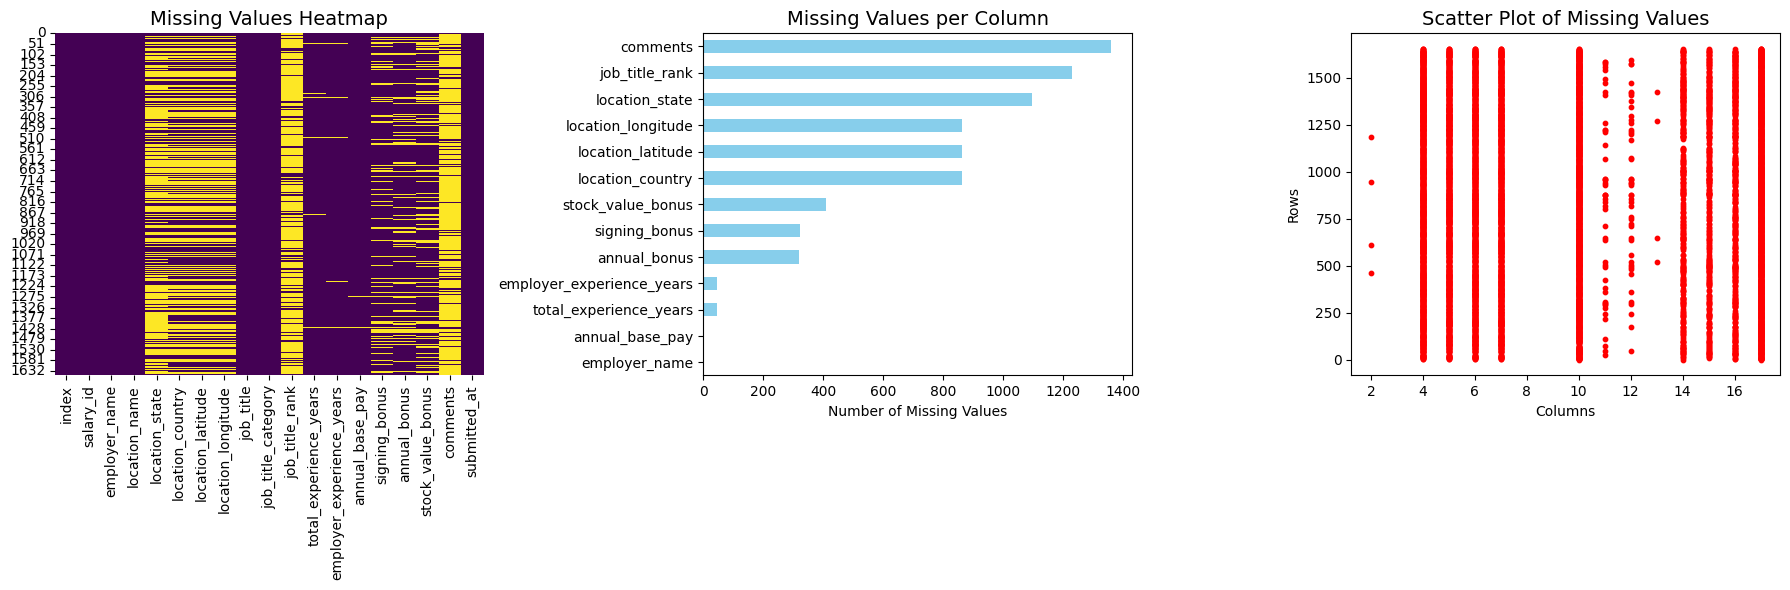

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
missing_data = df.isnull()
sns.heatmap(missing_data, cmap='viridis', cbar=False, ax=axes[0])
axes[0].set_title('Missing Values Heatmap', fontsize=14)
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
if not missing_counts.empty:
    missing_counts.sort_values().plot(kind='barh', color='skyblue', ax=axes[1])
    axes[1].set_title('Missing Values per Column', fontsize=14)
    axes[1].set_xlabel('Number of Missing Values')
else:
    axes[1].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=14, color='green')
    axes[1].set_title('Missing Values per Column', fontsize=14)
axes[2].scatter(np.where(df.isnull())[1], np.where(df.isnull())[0], color='red', s=10)
axes[2].set_title('Scatter Plot of Missing Values', fontsize=14)
axes[2].set_xlabel('Columns')
axes[2].set_ylabel('Rows')
plt.tight_layout()
plt.show()

In [19]:
categorical_columns = ['employer_name', 'location_state', 'location_country', 'job_title_rank', 'stock_value_bonus', 'comments']
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Drop rows with missing critical columns (location_name, job_title)
df.dropna(subset=['location_name', 'job_title'], inplace=True)

# List of numeric columns to impute
numeric_columns = ['location_latitude', 'location_longitude', 'total_experience_years', 'employer_experience_years', 'annual_base_pay', 'signing_bonus', 'annual_bonus']

# Impute missing numeric values for critical columns with the median (or mean, depending on the distribution)
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].median())  # Using median for numeric columns to avoid outliers

# Drop rows where 'stock_value_bonus' or 'comments' are missing, since they are less important for clustering
df.dropna(subset=['stock_value_bonus', 'comments'], inplace=True)

# Check if there are still any missing values
missing_values = df.isnull().sum()
print(missing_values)


index                        0
salary_id                    0
employer_name                0
location_name                0
location_state               0
location_country             0
location_latitude            0
location_longitude           0
job_title                    0
job_title_category           0
job_title_rank               0
total_experience_years       0
employer_experience_years    0
annual_base_pay              0
signing_bonus                0
annual_bonus                 0
stock_value_bonus            0
comments                     0
submitted_at                 0
dtype: int64


In [21]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [23]:
print(df.dtypes)

index                          int64
salary_id                      int64
employer_name                 object
location_name                 object
location_state                object
location_country              object
location_latitude            float64
location_longitude           float64
job_title                     object
job_title_category            object
job_title_rank                object
total_experience_years       float64
employer_experience_years    float64
annual_base_pay              float64
signing_bonus                float64
annual_bonus                 float64
stock_value_bonus             object
comments                      object
submitted_at                  object
dtype: object


In [25]:
df.drop(columns=['salary_id', 'index', 'comments', 'submitted_at'], inplace=True)

In [27]:
numerical_columns = ['location_latitude', 'location_longitude', 'total_experience_years', 'employer_experience_years', 
                     'annual_base_pay', 'signing_bonus', 'annual_bonus']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [29]:
df = pd.get_dummies(df, columns=['employer_name', 'location_name', 'job_title', 'location_state', 'location_country', 'job_title_category', 'job_title_rank'])

Text(0.5, 1.0, 'Boxplots to Detect Outliers')

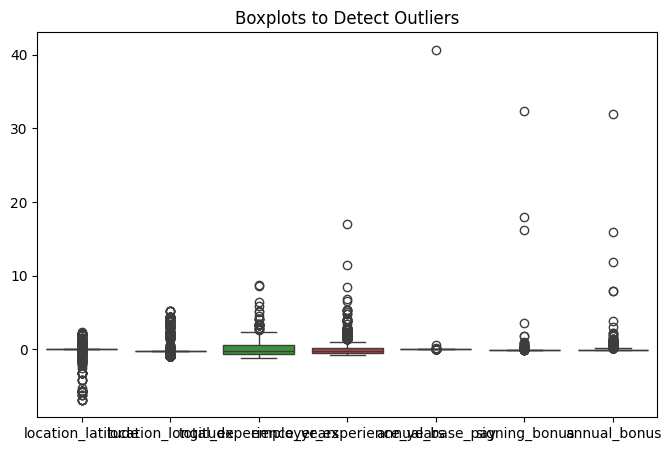

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplots to Detect Outliers")

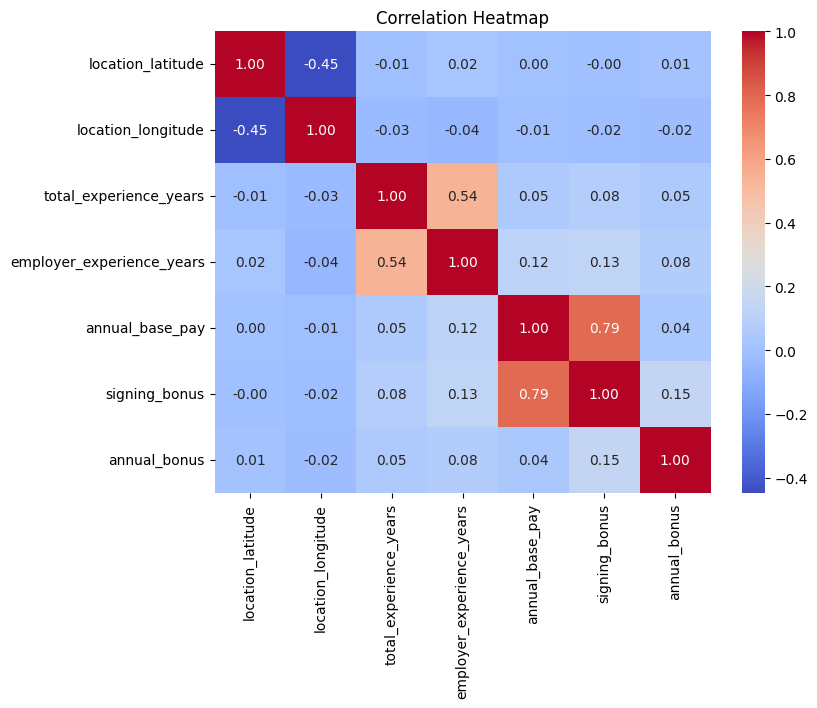

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()
sns.pairplot(df[numerical_columns])
plt.show()

Skewness: 40.6652397502939


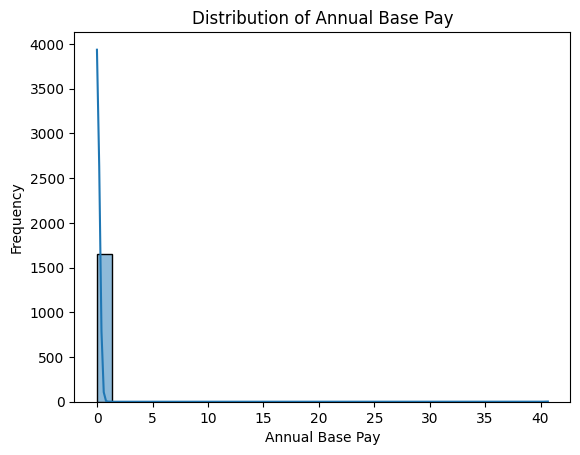

In [33]:
# Check the skewness of the annual_base_pay column
skewness = df['annual_base_pay'].skew()
print(f"Skewness: {skewness}")
sns.histplot(df['annual_base_pay'], kde=True, bins=30)
plt.title("Distribution of Annual Base Pay")
plt.xlabel("Annual Base Pay")
plt.ylabel("Frequency")
plt.show()

In [35]:
z_scores = zscore(df[numerical_columns])
outliers = (z_scores > 3) | (z_scores < -3)
df_no_outliers = df[~outliers.any(axis=1)]
print(f"Removed {len(df) - len(df_no_outliers)} outliers")

Removed 118 outliers


In [37]:
df['annual_base_pay'] = np.log1p(df['annual_base_pay'])

In [39]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers_iqr = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Removed {len(df) - len(df_no_outliers_iqr)} outliers using IQR method")

Removed 1128 outliers using IQR method


In [41]:
print(df_no_outliers[numerical_columns].describe())

       location_latitude  location_longitude  total_experience_years  \
count        1537.000000         1537.000000             1537.000000   
mean            0.162928           -0.156093               -0.078455   
std             0.490253            0.644051                0.816938   
min            -2.606430           -0.876543               -1.195086   
25%             0.034116           -0.297089               -0.660471   
50%             0.034116           -0.297089               -0.304061   
75%             0.034116           -0.297089                0.408759   
max             2.315451            2.818474                2.903629   

       employer_experience_years  annual_base_pay  signing_bonus  annual_bonus  
count                1537.000000      1537.000000    1537.000000   1537.000000  
mean                   -0.084214        -0.024741      -0.043146     -0.049754  
std                     0.655104         0.016252       0.080873      0.223938  
min                    -0.8

In [8]:
# plt.figure(figsize=(8, 6))
# sns.boxplot(data=df_no_outliers[numerical_columns])
# plt.title("Boxplot After Removing Outliers")
# plt.show()

In [45]:
# Apply clipping for outliers based on quantiles
lower_limit = df[numerical_columns].quantile(0.01)
upper_limit = df[numerical_columns].quantile(0.99)
df[numerical_columns] = df[numerical_columns].apply(lambda x: x.clip(lower=lower_limit[x.name], upper=upper_limit[x.name]))
# Standardize numerical columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [49]:
# numerical_columns = ['location_latitude', 'location_longitude', 'total_experience_years',
#                      'employer_experience_years', 'annual_base_pay', 'signing_bonus', 'annual_bonus']
# lower_limit = df[numerical_columns].quantile(0.01)
# upper_limit = df[numerical_columns].quantile(0.99)
# df[numerical_columns] = df[numerical_columns].apply(lambda x: np.clip(x, lower_limit[x.name], upper_limit[x.name]))
# scaler = StandardScaler()
# df_scaled = df[numerical_columns].copy()
# df_scaled[numerical_columns] = scaler.fit_transform(df[numerical_columns])
# df[numerical_columns] = df_scaled
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=df[numerical_columns])
# plt.title("Boxplot After Re-capping and Scaling")
# plt.show()
# print(df[numerical_columns].describe())

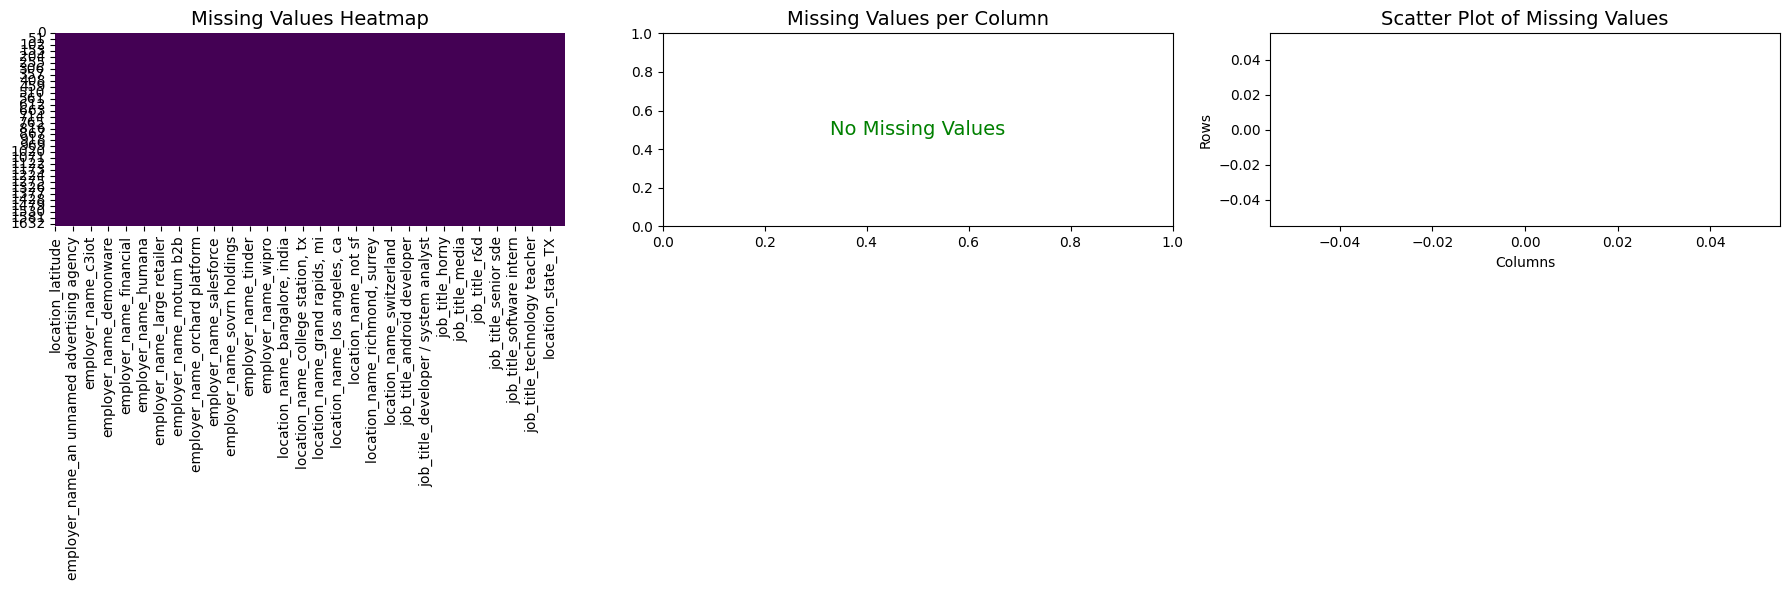

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
missing_data = df.isnull()
sns.heatmap(missing_data, cmap='viridis', cbar=False, ax=axes[0])
axes[0].set_title('Missing Values Heatmap', fontsize=14)
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0] 
if not missing_counts.empty:
    missing_counts.sort_values().plot(kind='barh', color='skyblue', ax=axes[1])
    axes[1].set_title('Missing Values per Column', fontsize=14)
    axes[1].set_xlabel('Number of Missing Values')
else:
    axes[1].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=14, color='green')
    axes[1].set_title('Missing Values per Column', fontsize=14)
axes[2].scatter(np.where(df.isnull())[1], np.where(df.isnull())[0], color='red', s=10)
axes[2].set_title('Scatter Plot of Missing Values', fontsize=14)
axes[2].set_xlabel('Columns')
axes[2].set_ylabel('Rows')
plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'Histograms of Numerical Columns')

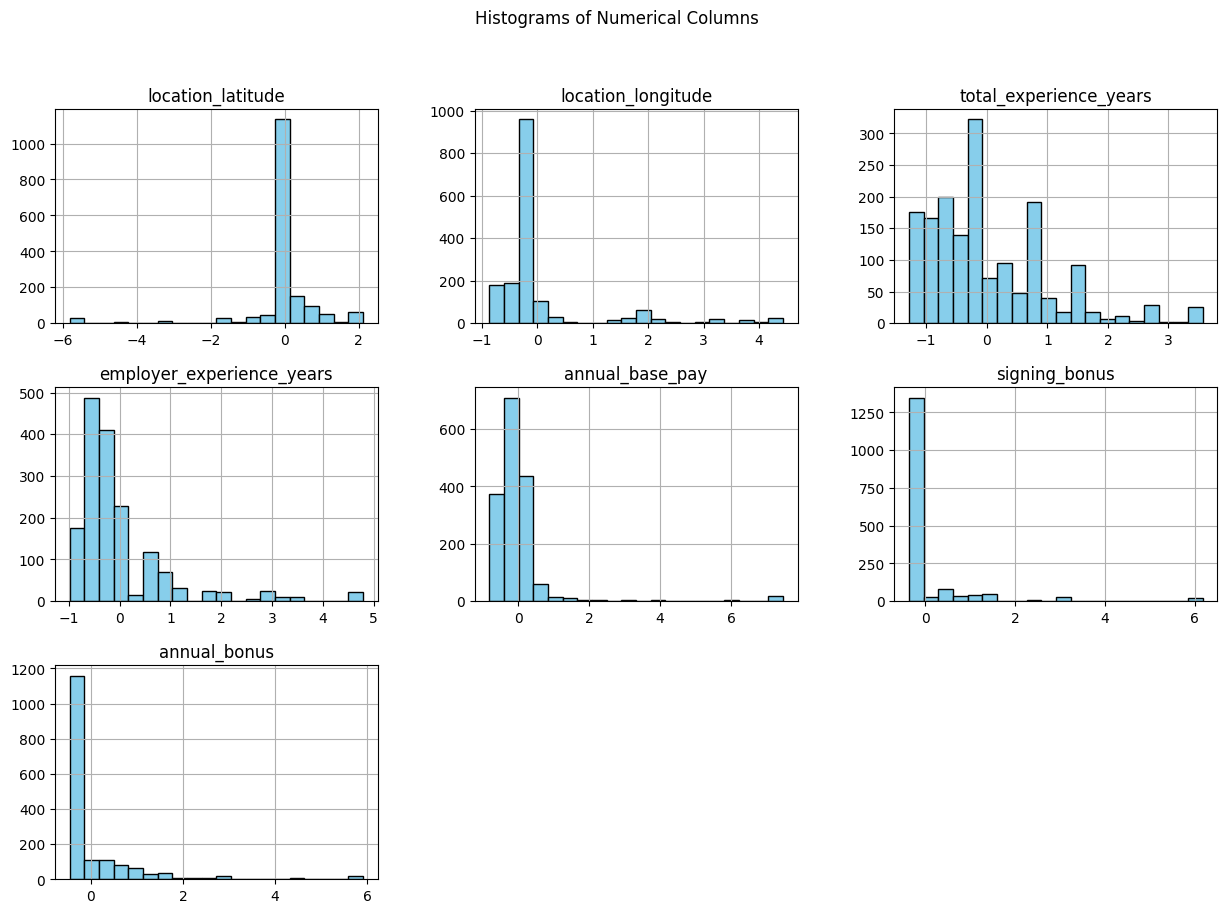

In [49]:
df.select_dtypes(include=['int64', 'float64']).hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Columns")

In [51]:
df['annual_base_pay'].var()

1.0006045949214035

In [57]:
df['annual_bonus'].var()

1.0006045949214033

In [59]:
df.describe()

location_latitude  location_longitude  total_experience_years  \
count       1.655000e+03        1.655000e+03            1.655000e+03   
mean        2.146655e-17       -6.010633e-17           -3.219982e-17   
std         1.000302e+00        1.000302e+00            1.000302e+00   
min        -5.820544e+00       -8.693428e-01           -1.283435e+00   
25%         3.028948e-02       -2.982463e-01           -7.016972e-01   
50%         3.028948e-02       -2.982463e-01           -3.138722e-01   
75%         3.028948e-02       -2.982463e-01            6.556901e-01   
max         2.119745e+00        4.433221e+00            3.564377e+00   

       employer_experience_years  annual_base_pay  signing_bonus  annual_bonus  
count               1.655000e+03     1.655000e+03   1.655000e+03  1.655000e+03  
mean               -3.005317e-17     2.204614e-15  -1.030394e-16 -2.575986e-17  
std                 1.000302e+00     1.000302e+00   1.000302e+00  1.000302e+00  
min                -9.836910e-01    -8.118273e-01  -3.585566e-01 -4.634847e-01  
25%                -5.988290e-01    -3.900708e-01  -3.585566e-01 -4.634847e-01  
50%                -2.139670e-01    -1.246449e-01  -3.585566e-01 -4.289129e-01  
75%                 1.708950e-01     8.624465e-02  -1.624485e-01  2.950879e-02  
max                 4.789239e+00     7.462884e+00   6.178380e+00  5.919986e+00

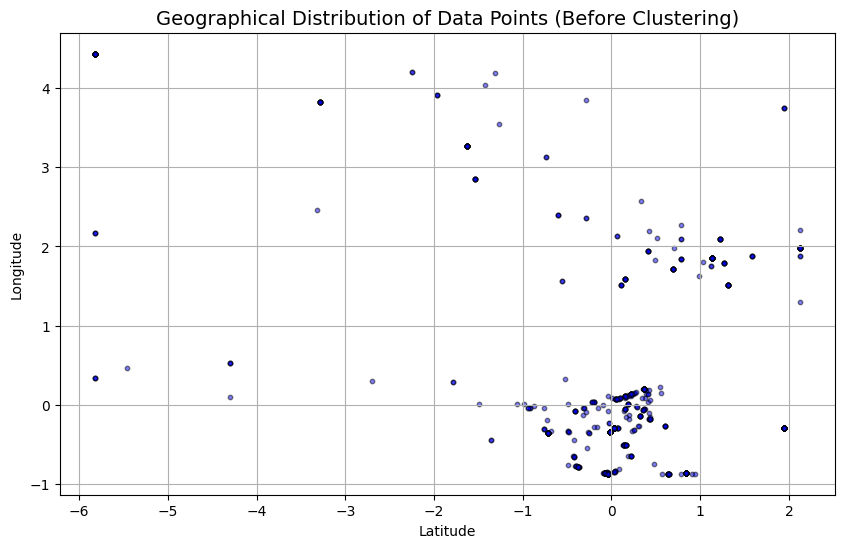

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(df['location_latitude'], df['location_longitude'], alpha=0.5, c='blue', edgecolors='k', s=10)
plt.title('Geographical Distribution of Data Points (Before Clustering)', fontsize=14)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.grid(True)
plt.show()

C:\Users\khali\AppData\Local\Temp\ipykernel_9456\446620666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='counts', y=location_counts.index, data=location_counts, palette='viridis')


Text(0, 0.5, 'Location Index (Latitude, Longitude)')

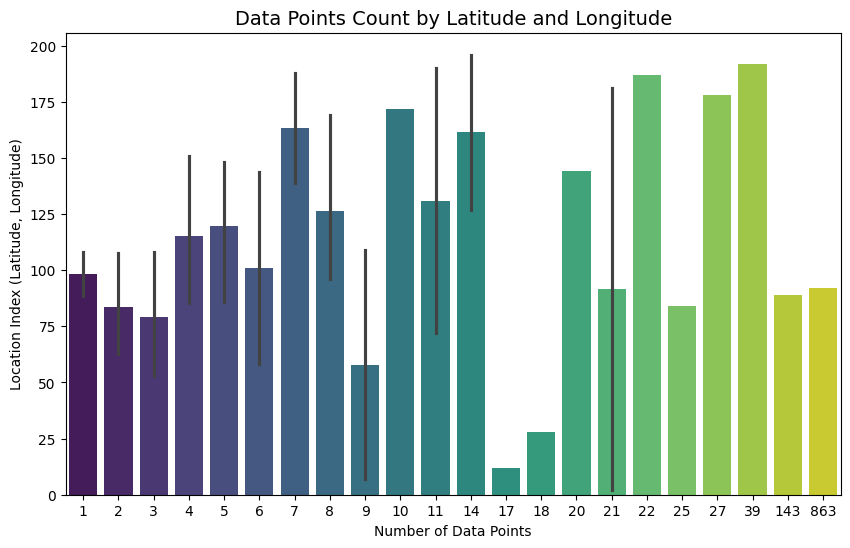

In [53]:
location_counts = df.groupby(['location_latitude', 'location_longitude']).size().reset_index(name='counts')
location_counts = location_counts.sort_values('counts', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='counts', y=location_counts.index, data=location_counts, palette='viridis')
plt.title('Data Points Count by Latitude and Longitude', fontsize=14)
plt.xlabel('Number of Data Points')
plt.ylabel('Location Index (Latitude, Longitude)')

Cluster Centers:
[[ 0.17572504 -0.14578579 -0.02489591 -0.0222755  -0.14134449 -0.16307962
  -0.17613487]
 [-3.54839849  3.35043523 -0.17236854 -0.2524532  -0.11199289 -0.34514708
  -0.33591718]
 [ 0.05758704 -0.28101731  0.37910181  0.39554702  1.65519127  2.03358524
   2.17523804]]


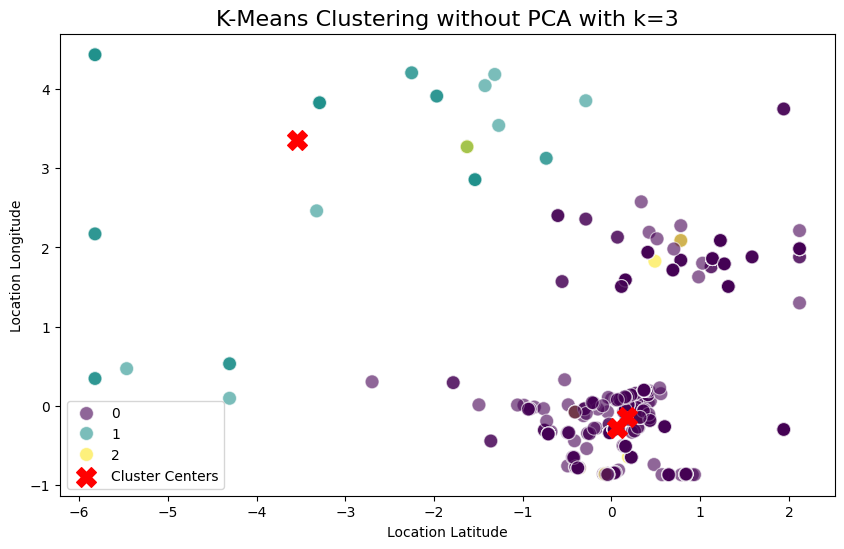

Cluster
0    1452
2     129
1      74
Name: count, dtype: int64


In [55]:
numerical_columns = ['location_latitude', 'location_longitude', 'total_experience_years', 
                     'employer_experience_years', 'annual_base_pay', 'signing_bonus', 'annual_bonus']
k = 3 
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_columns])
df['Cluster'] = df['Cluster'].astype(int)
print("Cluster Centers:")
print(kmeans.cluster_centers_)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='location_latitude', y='location_longitude', hue='Cluster', palette='viridis', data=df, s=100, alpha=0.6)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title('K-Means Clustering without PCA with k=3', fontsize=16)
plt.xlabel('Location Latitude')
plt.ylabel('Location Longitude')
plt.legend()
plt.show()
print(df['Cluster'].value_counts())

Cluster Centers:
[[ 1.68357317e-01 -1.61161760e-01  9.21247094e-03  1.25897371e-02
  -1.47783661e-03  1.04196276e-02  1.28244097e-02]
 [-3.49784478e+00  3.34834762e+00 -1.91401205e-01 -2.61568355e-01
   3.07040002e-02 -2.16481473e-01 -2.66443986e-01]]


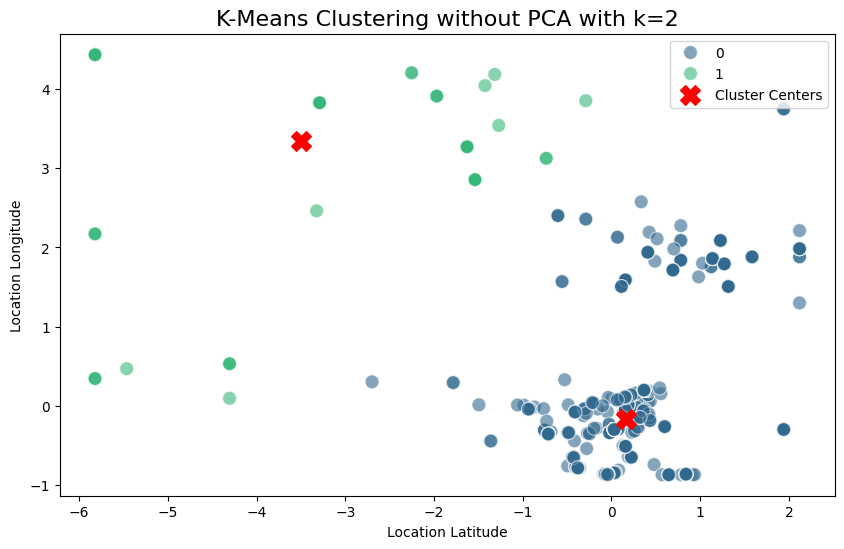

Cluster
0    1579
1      76
Name: count, dtype: int64


In [57]:
k = 2 
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_columns])
df['Cluster'] = df['Cluster'].astype(int)
print("Cluster Centers:")
print(kmeans.cluster_centers_)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='location_latitude', y='location_longitude', hue='Cluster', palette='viridis', data=df, s=100, alpha=0.6)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title('K-Means Clustering without PCA with k=2', fontsize=16)
plt.xlabel('Location Latitude')
plt.ylabel('Location Longitude')
plt.legend()
plt.show()
print(df['Cluster'].value_counts())

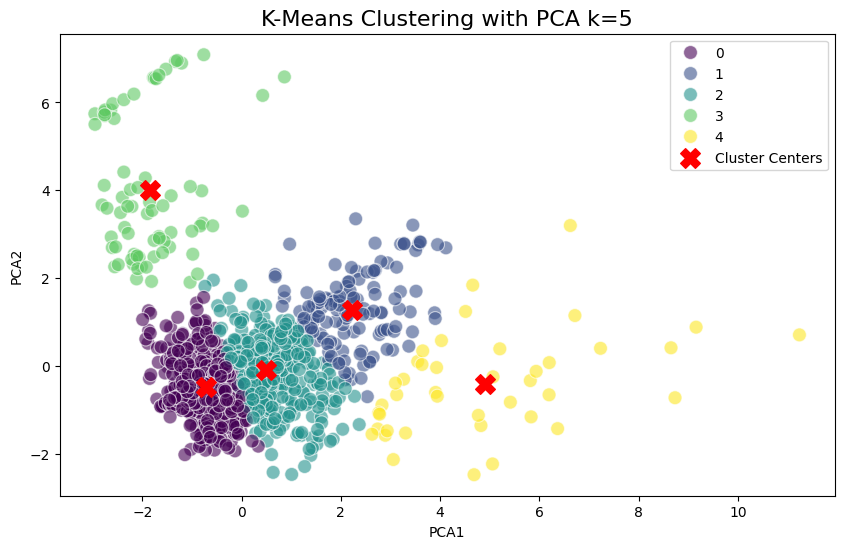

Cluster
0    863
2    544
1    133
3     74
4     41
Name: count, dtype: int64


In [59]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(pca_components)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df, s=100, alpha=0.6)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title('K-Means Clustering with PCA k=5', fontsize=16)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()
print(df['Cluster'].value_counts())

ValueError: perplexity must be less than n_samples

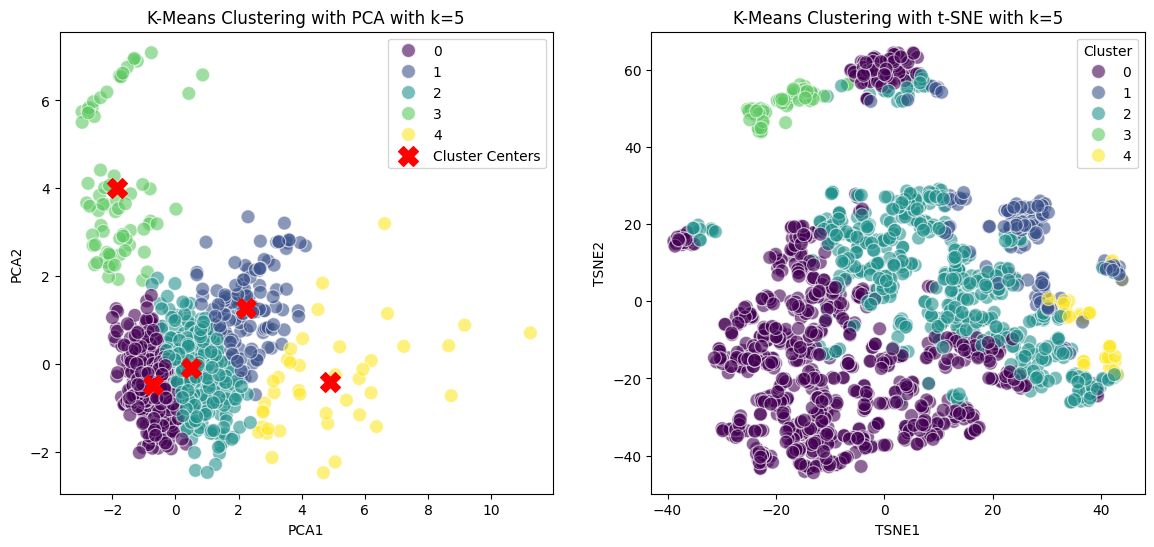

In [160]:
k = 5
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(pca_components)
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(scaled_data)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]
df['TSNE1'] = tsne_components[:, 0]
df['TSNE2'] = tsne_components[:, 1]
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.title('K-Means Clustering with PCA with k=5')
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df, s=100, alpha=0.6)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.subplot(1, 2, 2)
plt.title('K-Means Clustering with t-SNE with k=5')
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis', data=df, s=100, alpha=0.6)
centers_tsne = tsne.fit_transform(kmeans.cluster_centers_)  # Transform the cluster centers using the same t-SNE
plt.scatter(centers_tsne[:, 0], centers_tsne[:, 1], c='red', s=200, marker='X', label='Cluster Centers', edgecolor='black')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()
print(df['Cluster'].value_counts())

In [154]:
# sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette="Set1", s=100, edgecolor='black')

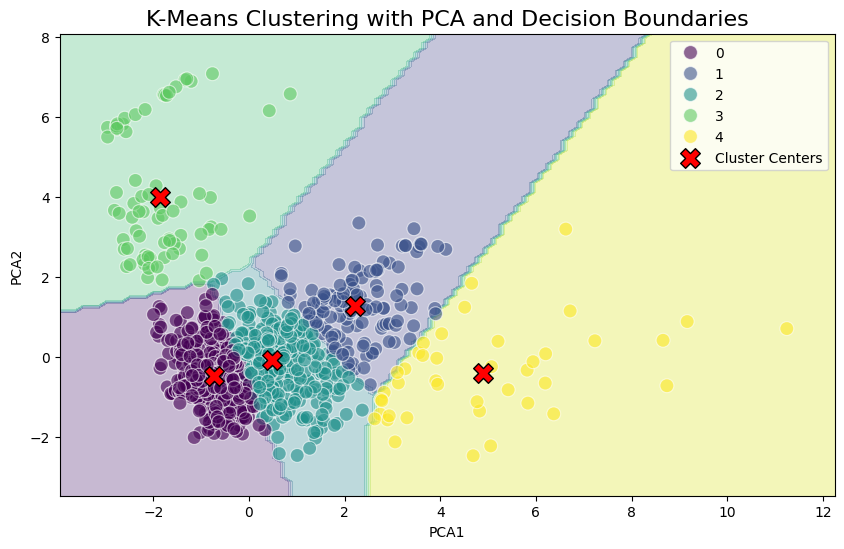

C:\Users\khali\AppData\Local\Temp\ipykernel_8308\1780454021.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


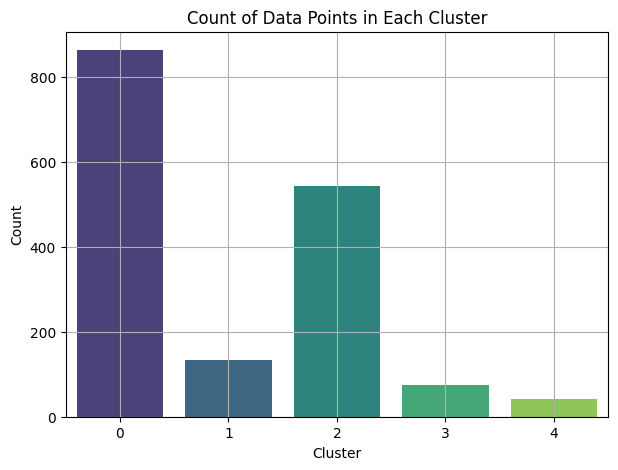

Cluster
0    863
2    544
1    133
3     74
4     41
Name: count, dtype: int64


In [75]:
plt.figure(figsize=(10, 6))
x_min, x_max = df['PCA1'].min() - 1, df['PCA1'].max() + 1
y_min, y_max = df['PCA2'].min() - 1, df['PCA2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df, s=100, alpha=0.6)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers', edgecolor='black')
plt.title('K-Means Clustering with PCA and Decision Boundaries', fontsize=16)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()
plt.figure(figsize=(7, 5))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Count of Data Points in Each Cluster', fontsize=12)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(True)
plt.show()
print(df['Cluster'].value_counts())

In [77]:
columns_to_include = ['total_experience_years', 'employer_experience_years', 'annual_base_pay', 'signing_bonus', 'annual_bonus']
for cluster_num in range(k):
    print(f"Statistical Summary for Cluster {cluster_num}:")
    cluster_data = df[df['Cluster'] == cluster_num]
    display(cluster_data[columns_to_include].describe())
    print("\n")

Statistical Summary for Cluster 0:


total_experience_years  employer_experience_years  annual_base_pay  \
count              863.000000                 863.000000       863.000000   
mean                -0.563660                  -0.427175        -0.261495   
std                  0.473260                   0.365691         0.316904   
min                 -1.283435                  -0.983691        -0.811827   
25%                 -0.895610                  -0.598829        -0.459691   
50%                 -0.701697                  -0.598829        -0.279996   
75%                 -0.313872                  -0.213967        -0.086500   
max                  1.625253                   0.940619         2.295790   

       signing_bonus  annual_bonus  
count     863.000000    863.000000  
mean       -0.193882     -0.319959  
std         0.416765      0.297930  
min        -0.358557     -0.463485  
25%        -0.358557     -0.463485  
50%        -0.358557     -0.428913  
75%        -0.358066     -0.394341  
max         3.563605      1.403391



Statistical Summary for Cluster 1:


total_experience_years  employer_experience_years  annual_base_pay  \
count              133.000000                 133.000000       133.000000   
mean                 1.714190                   2.053246         0.849167   
std                  1.218841                   1.655750         2.174017   
min                 -1.089522                  -0.598829        -0.811397   
25%                  0.849603                   0.940619        -0.134872   
50%                  1.625253                   2.095205         0.086245   
75%                  2.594815                   3.249791         0.486944   
max                  3.564377                   4.789239         7.462884   

       signing_bonus  annual_bonus  
count     133.000000    133.000000  
mean       -0.143727      0.384605  
std         0.733208      1.310505  
min        -0.358557     -0.463485  
25%        -0.358557     -0.463277  
50%        -0.358557     -0.359769  
75%        -0.358557      0.919386  
max         6.178380      5.919986



Statistical Summary for Cluster 2:


total_experience_years  employer_experience_years  annual_base_pay  \
count              544.000000                 544.000000       544.000000   
mean                 0.423815                   0.117552         0.076945   
std                  0.829982                   0.678396         0.627904   
min                 -1.283435                  -0.983691        -0.811827   
25%                 -0.313872                  -0.406398        -0.150421   
50%                  0.461778                   0.016950         0.051697   
75%                  0.849603                   0.555757         0.191610   
max                  2.788727                   2.864929         7.462884   

       signing_bonus  annual_bonus  
count     544.000000    544.000000  
mean        0.164943      0.154016  
std         1.111848      0.808270  
min        -0.358557     -0.463485  
25%        -0.358557     -0.463485  
50%        -0.358557     -0.283711  
75%         0.197083      0.573668  
max         6.178380      4.722281



Statistical Summary for Cluster 3:


total_experience_years  employer_experience_years  annual_base_pay  \
count               74.000000                  74.000000        74.000000   
mean                -0.133062                  -0.236851        -0.266164   
std                  0.841936                   0.602351         1.007659   
min                 -1.283435                  -0.983691        -0.811827   
25%                 -0.701697                  -0.598829        -0.650465   
50%                 -0.313872                  -0.598829        -0.483882   
75%                  0.267865                   0.170895        -0.190156   
max                  2.594815                   2.095205         7.462884   

       signing_bonus  annual_bonus  
count      74.000000     74.000000  
mean       -0.345147     -0.336262  
std         0.043288      0.262139  
min        -0.358557     -0.463485  
25%        -0.358557     -0.463485  
50%        -0.358557     -0.428913  
75%        -0.358557     -0.368412  
max        -0.162449      0.919386



Statistical Summary for Cluster 4:


total_experience_years  employer_experience_years  annual_base_pay  \
count               41.000000                  41.000000        41.000000   
mean                 0.920546                   1.198758         2.209001   
std                  1.015735                   1.678463         2.706004   
min                 -0.701697                  -0.983691        -0.811145   
25%                  0.267865                  -0.213967         0.397140   
50%                  0.655690                   0.555757         0.915170   
75%                  1.431340                   2.480067         3.330500   
max                  3.564377                   4.789239         7.462884   

       signing_bonus  annual_bonus  
count      41.000000     41.000000  
mean        2.981659      4.050496  
std         2.913810      2.179840  
min        -0.358557     -0.463485  
25%        -0.358557      2.647975  
50%         2.909912      4.722281  
75%         6.178380      5.919986  
max         6.178380      5.919986

In [89]:
silhouette_avg = silhouette_score(scaled_data, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2139410294490279


In [87]:
db_score = davies_bouldin_score(scaled_data, df['Cluster'])
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 1.696221268912338


In [91]:
ch_score = calinski_harabasz_score(scaled_data, df['Cluster'])
print(f"Calinski-Harabasz Score: {ch_score}")

Calinski-Harabasz Score: 314.9095469116617


Hopkins Statistic: 1.0


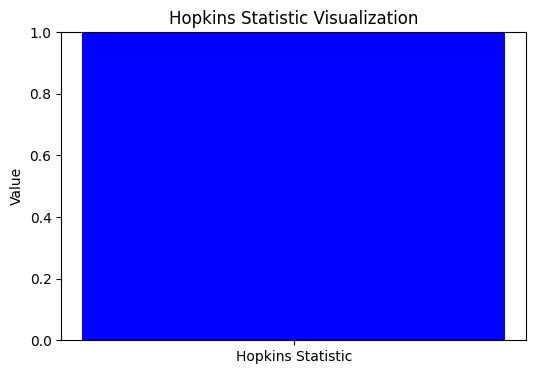

In [63]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
def hopkins_statistic(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    uj = 0.0
    wj = 0.0
    for j in range(m):
        u_dist, _ = nbrs.kneighbors(np.random.uniform(X.min(), X.max(), (1, d)), return_distance=True)
        uj += u_dist[0][0]
        w_dist, _ = nbrs.kneighbors(X.loc[[np.random.choice(X.index)], :].values, return_distance=True)
        wj += w_dist[0][0]
    H = uj / (uj + wj)
    return H
hopkins_stat = hopkins_statistic(df[numeric_columns])
print("Hopkins Statistic:", hopkins_stat)
plt.figure(figsize=(6, 4))
plt.bar('Hopkins Statistic', hopkins_stat, color='blue')
plt.ylim(0, 1)
plt.ylabel('Value')
plt.title('Hopkins Statistic Visualization')
plt.show()

Inertia for 2 clusters: 6627.886805738137
Inertia for 3 clusters: 5924.647084136148
Inertia for 4 clusters: 4123.557398052348
Inertia for 5 clusters: 3820.9951790430555
Inertia for 6 clusters: 3273.1740792976675
Inertia for 7 clusters: 2236.4080655627904
Inertia for 8 clusters: 2024.6974614849194
Inertia for 9 clusters: 1886.842840616216
Inertia for 10 clusters: 1790.1981924053794


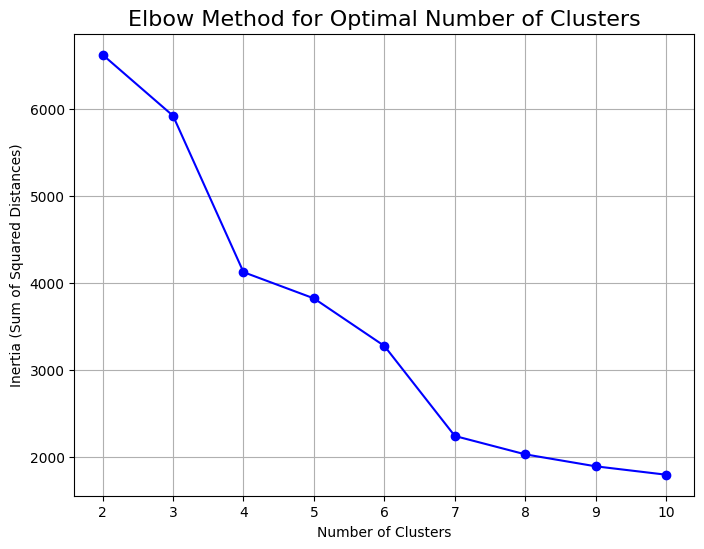

In [109]:
range_n_clusters = list(range(2, 11))
inertia_values = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
    print(f'Inertia for {n_clusters} clusters: {kmeans.inertia_}')  # Print inertia for each k
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=16)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

In [97]:
cluster_counts = df['Cluster'].value_counts()
print("Cluster Size Distribution:\n", cluster_counts)

Cluster Size Distribution:
 Cluster
0    863
2    544
1    133
3     74
4     41
Name: count, dtype: int64


Silhouette Score for 2 clusters: 0.4335
Silhouette Score for 3 clusters: 0.2978
Silhouette Score for 4 clusters: 0.3448
Silhouette Score for 5 clusters: 0.3520
Silhouette Score for 6 clusters: 0.3858
Silhouette Score for 7 clusters: 0.3894
Silhouette Score for 8 clusters: 0.3576
Silhouette Score for 9 clusters: 0.3146
Silhouette Score for 10 clusters: 0.3157


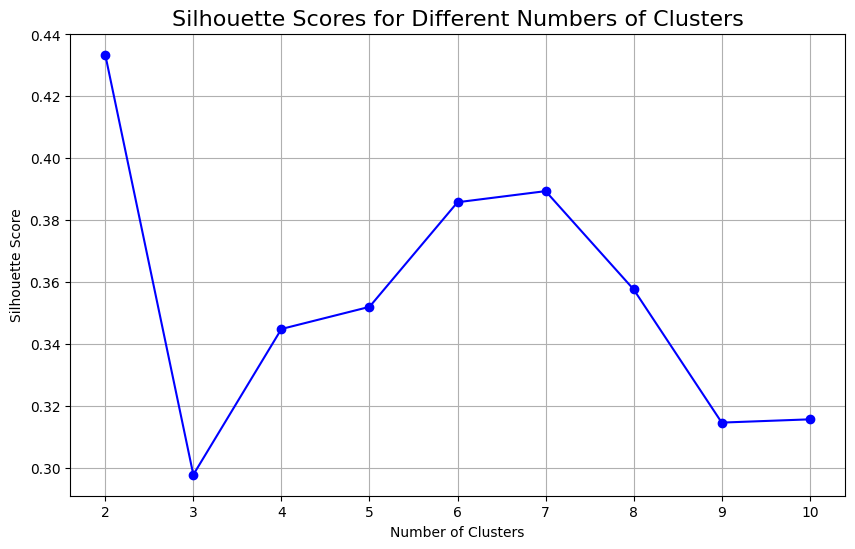

In [101]:
X = df[['location_latitude', 'location_longitude', 'total_experience_years', 'employer_experience_years', 'annual_base_pay']].dropna().values
range_n_clusters = list(range(2, 11))
sil_scores = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    sil_scores.append(score)
    print(f"Silhouette Score for {n_clusters} clusters: {score:.4f}")
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, sil_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Scores for Different Numbers of Clusters', fontsize=16)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

C:\Users\khali\AppData\Local\Temp\ipykernel_8308\1289317673.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(4), y=cluster_silhouette_avg, palette='viridis')


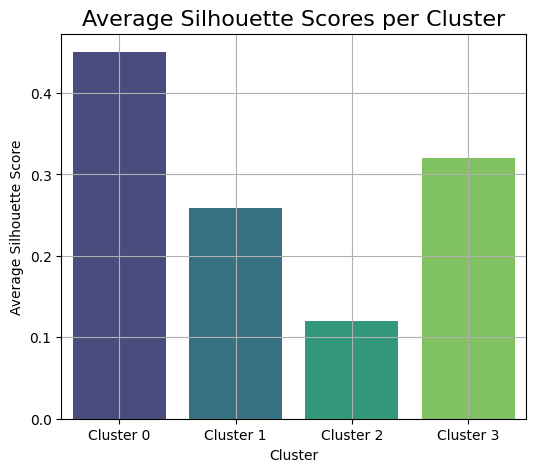

In [121]:
from sklearn.metrics import silhouette_samples
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X)
silhouette_vals = silhouette_samples(X, cluster_labels)
cluster_silhouette_avg = []
for i in range(4):
    cluster_silhouette_avg.append(np.mean(silhouette_vals[cluster_labels == i]))
plt.figure(figsize=(6, 5))
sns.barplot(x=np.arange(4), y=cluster_silhouette_avg, palette='viridis')
plt.title('Average Silhouette Scores per Cluster', fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('Average Silhouette Score')
plt.xticks(np.arange(4), labels=[f'Cluster {i}' for i in range(4)])
plt.grid(True)
plt.show()

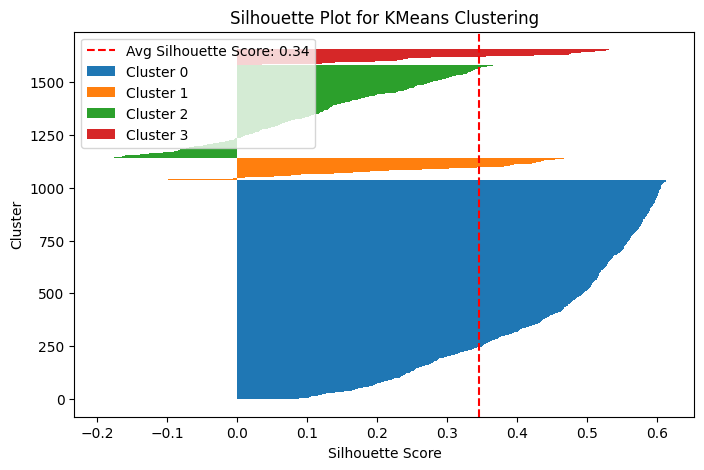

In [127]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X)
silhouette_vals = silhouette_samples(X, cluster_labels)
plt.figure(figsize=(8, 5))
y_lower, y_upper = 0, 0
for i in range(4): # this can be 5
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0, label=f'Cluster {i}')
    y_lower = y_upper
avg_score = silhouette_score(X, cluster_labels)
plt.axvline(avg_score, color="red", linestyle="--", label=f'Avg Silhouette Score: {avg_score:.2f}')
plt.title('Silhouette Plot for KMeans Clustering', fontsize=12)
plt.xlabel('Silhouette Score')
plt.ylabel('Cluster')
plt.legend(loc='upper left')
plt.show()

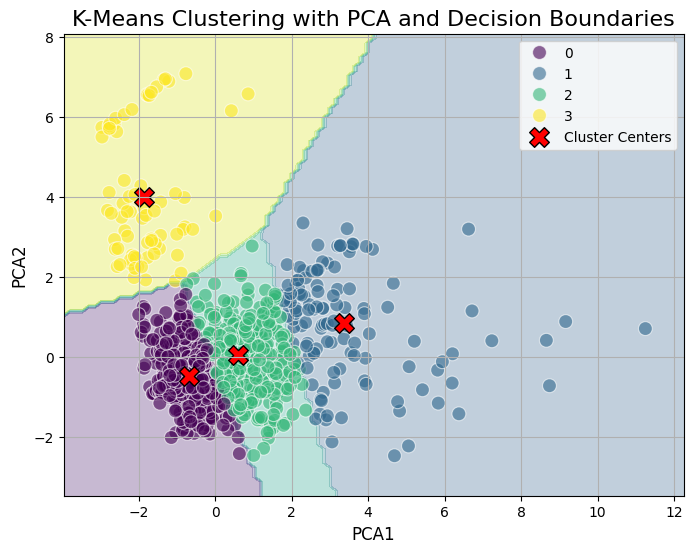

Cluster
0    911
2    544
1    126
3     74
Name: count, dtype: int64


In [155]:
pca = PCA(n_components=0.95)
pca_components = pca.fit_transform(scaled_data)
pca_2d = pca_components[:, :2]
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(pca_2d)
df['PCA1'] = pca_2d[:, 0]
df['PCA2'] = pca_2d[:, 1]
plt.figure(figsize=(8, 6))
x_min, x_max = df['PCA1'].min() - 1, df['PCA1'].max() + 1
y_min, y_max = df['PCA2'].min() - 1, df['PCA2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df, s=100, alpha=0.6)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers', edgecolor='black')
plt.title('K-Means Clustering with PCA and Decision Boundaries', fontsize=16)
plt.xlabel('PCA1', fontsize=12)
plt.ylabel('PCA2', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.show()
print(df['Cluster'].value_counts())

In [165]:
# pca = PCA(n_components=0.95)
# pca_components = pca.fit_transform(df[['location_latitude', 'location_longitude', 'total_experience_years']])
# kmeans = KMeans(n_clusters=4, random_state=42)
# df['Cluster'] = kmeans.fit_predict(pca_components)
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette='viridis', s=100, alpha=0.7)
# plt.title('K-Means Clustering in PCA Space', fontsize=16)
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(df['location_latitude'], df['location_longitude'], df['total_experience_years'],
#                      c=df['Cluster'], cmap='viridis', s=50, edgecolor='k', alpha=0.7)
# ax.set_xlabel('Location Latitude', fontsize=12)
# ax.set_ylabel('Location Longitude', fontsize=12)
# ax.set_zlabel('Total Experience Years', fontsize=12)
# ax.set_title('3D Scatter Plot of Clusters', fontsize=16)
# cbar = plt.colorbar(scatter)
# cbar.set_label('Cluster', fontsize=12)
# plt.show()

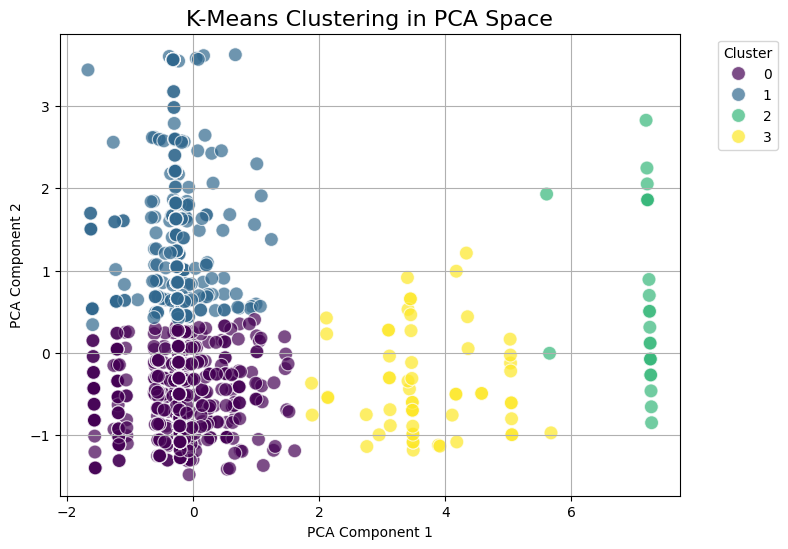

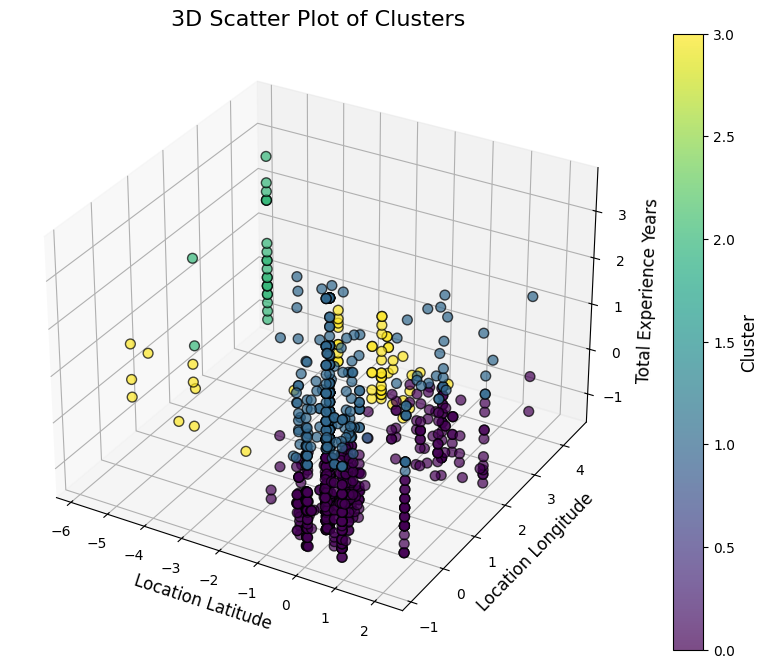

In [169]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[['location_latitude', 'location_longitude', 'total_experience_years']])
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(pca_components)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering in PCA Space', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['location_latitude'], df['location_longitude'], df['total_experience_years'],
                     c=df['Cluster'], cmap='viridis', s=50, edgecolor='k', alpha=0.7)
ax.set_xlabel('Location Latitude', fontsize=12)
ax.set_ylabel('Location Longitude', fontsize=12)
ax.set_zlabel('Total Experience Years', fontsize=12)
ax.set_title('3D Scatter Plot of Clusters', fontsize=16)
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster', fontsize=12)

plt.show()

In [162]:
# pca = PCA(n_components=2)
# pca_components = pca.fit_transform(df[['location_latitude', 'location_longitude', 'total_experience_years']])
# gmm = GaussianMixture(n_components=4, random_state=42)
# df['Cluster'] = gmm.fit_predict(pca_components)
# plt.figure(figsize=(8, 6))
# scatter = sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette='viridis', s=100, alpha=0.7)
# plt.title('GMM Clustering in PCA Space', fontsize=16)
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# # cbar = plt.colorbar(scatter.collections[0])
# # cbar.set_label('Cluster', fontsize=12)
# plt.show()

In [209]:
# pca = PCA(n_components=0.95)
# pca_components = pca.fit_transform(scaled_data)
# kmeans = KMeans(n_clusters=4, random_state=42)
# kmeans_labels = kmeans.fit_predict(pca_components)
# gmm = GaussianMixture(n_components=4, random_state=42)
# gmm_labels = gmm.fit_predict(pca_components)
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# dbscan_labels = dbscan.fit_predict(pca_components)
# df['KMeans_Cluster'] = kmeans_labels
# df['GMM_Cluster'] = gmm_labels
# df['DBSCAN_Cluster'] = dbscan_labels
# def plot_clustering_result(X, labels, title):
#     plt.figure(figsize=(8, 6))
#     # If DBSCAN, make sure -1 (outliers) are handled distinctly
#     if len(set(labels)) > 2 and -1 in labels:
#         plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
#     else:
#         plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
#     plt.title(title)
#     plt.xlabel('PCA Component 1')
#     plt.ylabel('PCA Component 2')
#     plt.colorbar()
#     plt.show()
# plot_clustering_result(pca_components, df['KMeans_Cluster'], 'K-Means Clustering')
# plot_clustering_result(pca_components, df['GMM_Cluster'], 'Gaussian Mixture Model Clustering')
# plot_clustering_result(pca_components, df['DBSCAN_Cluster'], 'DBSCAN Clustering')

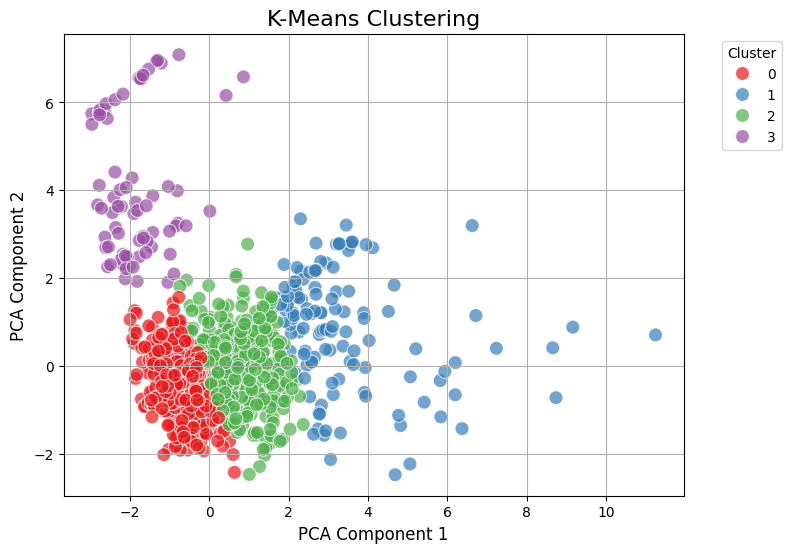

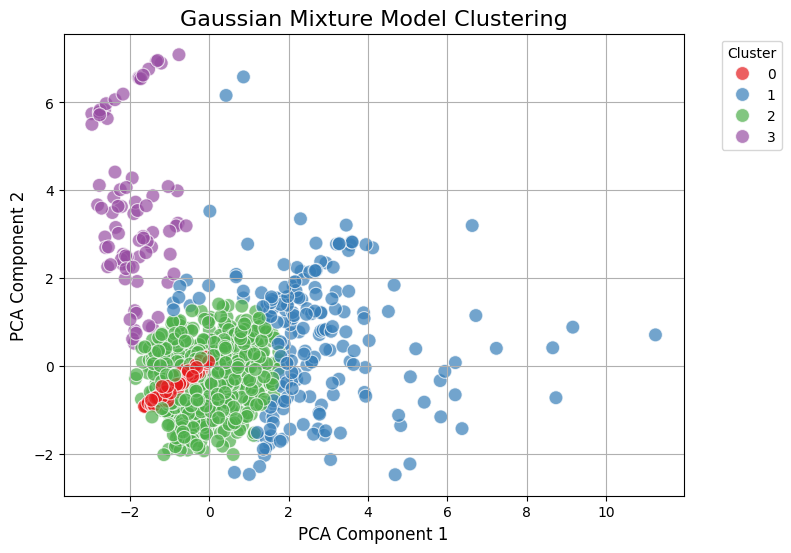

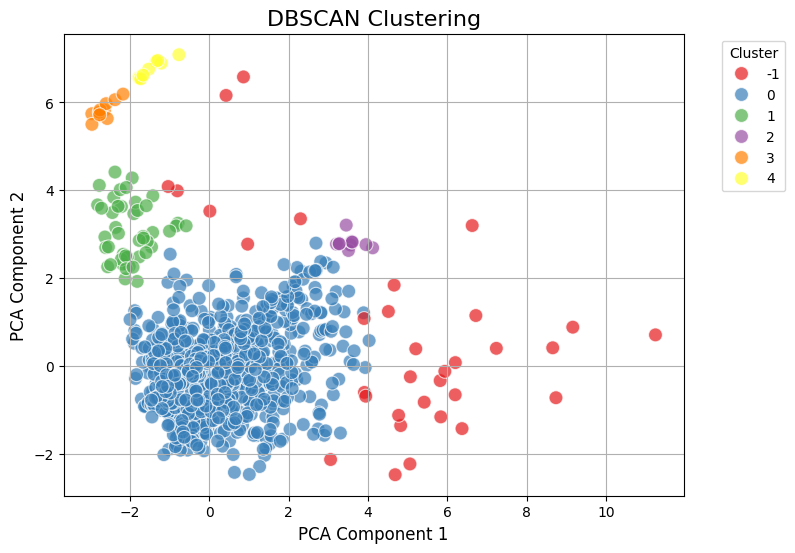

In [65]:
from sklearn.cluster import DBSCAN
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_components)
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(pca_components)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_components)
df['KMeans_Cluster'] = kmeans_labels
df['GMM_Cluster'] = gmm_labels
df['DBSCAN_Cluster'] = dbscan_labels
def plot_clustering_result(X, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set1', s=100, alpha=0.7)
    plt.title(title, fontsize=16)
    plt.xlabel('PCA Component 1', fontsize=12)
    plt.ylabel('PCA Component 2', fontsize=12)
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()
plot_clustering_result(pca_components, df['KMeans_Cluster'], 'K-Means Clustering')
plot_clustering_result(pca_components, df['GMM_Cluster'], 'Gaussian Mixture Model Clustering')
plot_clustering_result(pca_components, df['DBSCAN_Cluster'], 'DBSCAN Clustering')

In [207]:
# pca = PCA(n_components=0.95)
# pca_components = pca.fit_transform(scaled_data)
# Z = linkage(pca_components, method='ward')
# hierarchical_labels = fcluster(Z, t=4, criterion='maxclust') 
# df['Hierarchical_Cluster'] = hierarchical_labels
# def plot_clustering_result(X, labels, title):
#     plt.figure(figsize=(10, 6))
#     plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
#     plt.title(title)
#     plt.xlabel('PCA1')
#     plt.ylabel('PCA2')
#     plt.colorbar()
#     plt.show()
# plot_clustering_result(pca_components, df['Hierarchical_Cluster'], 'Hierarchical Clustering')
# plt.figure(figsize=(12, 8))
# dendrogram(Z)
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Data Points')
# plt.ylabel('Distance')

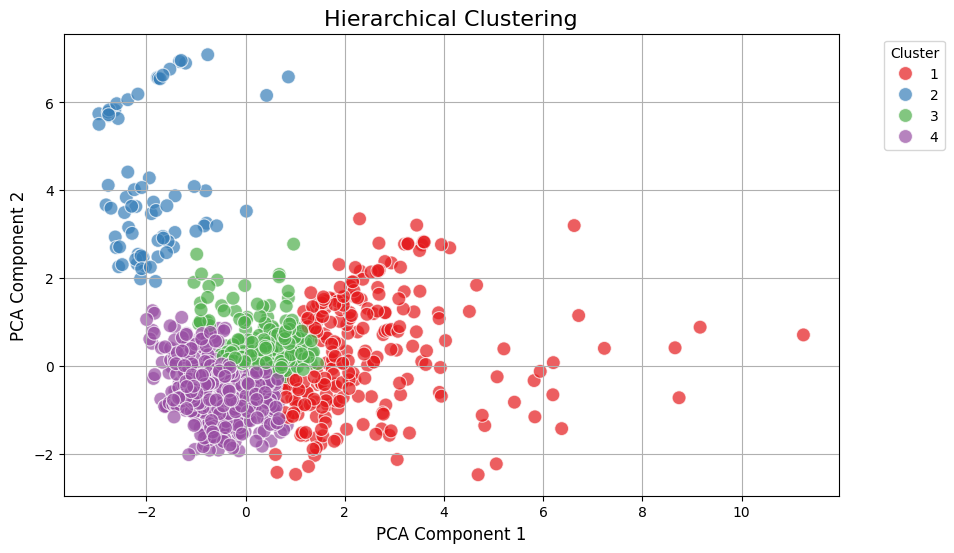

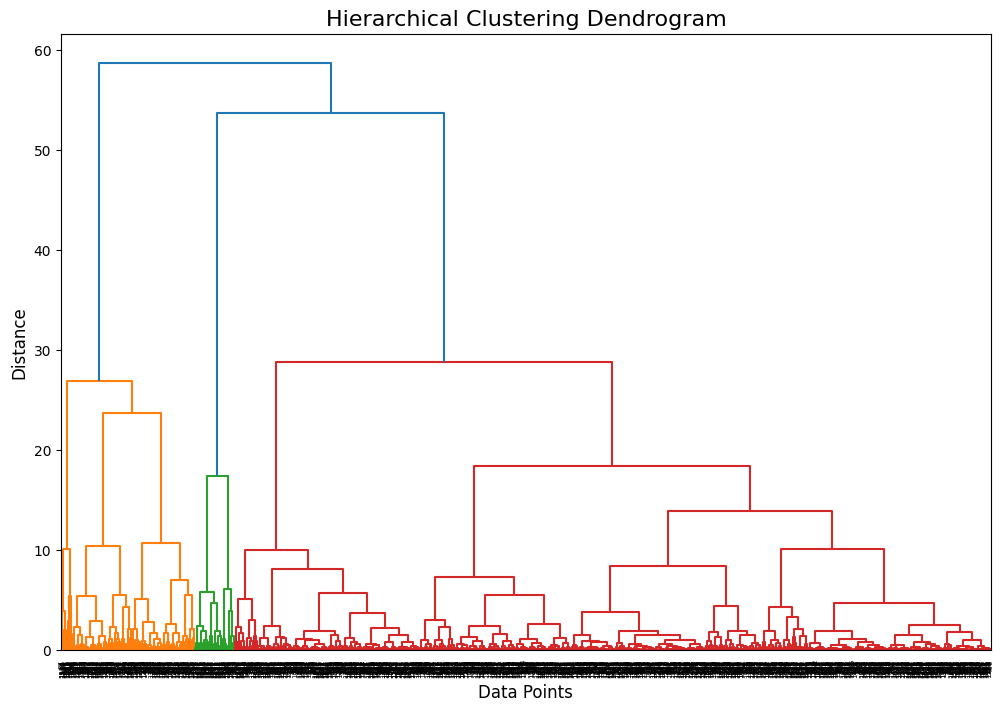

In [204]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
Z = linkage(pca_components, method='ward')
hierarchical_labels = fcluster(Z, t=4, criterion='maxclust')
df['Hierarchical_Cluster'] = hierarchical_labels
def plot_clustering_result(X, labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set1', s=100, alpha=0.7)
    plt.title(title, fontsize=16)
    plt.xlabel('PCA Component 1', fontsize=12)
    plt.ylabel('PCA Component 2', fontsize=12)
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()
plot_clustering_result(pca_components, df['Hierarchical_Cluster'], 'Hierarchical Clustering')
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram', fontsize=16)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.show()

## Below Lets Analyze K-Means and DBSCAN with different dimension Reduction Methods

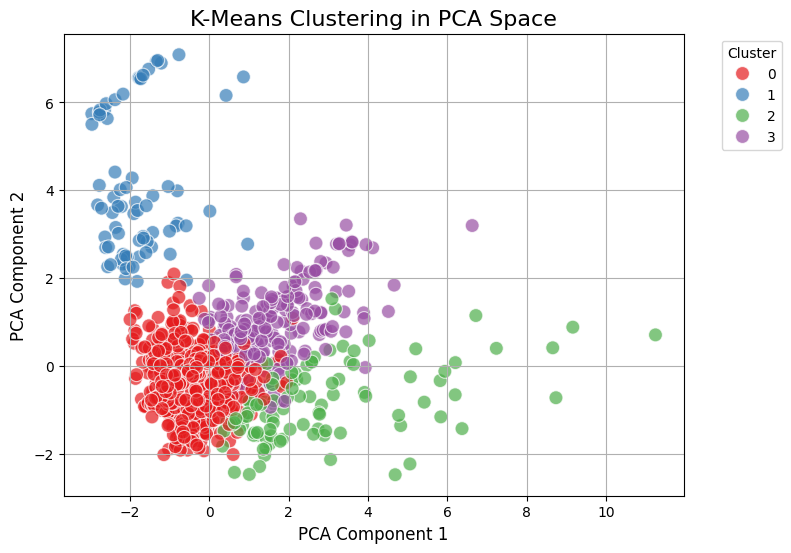

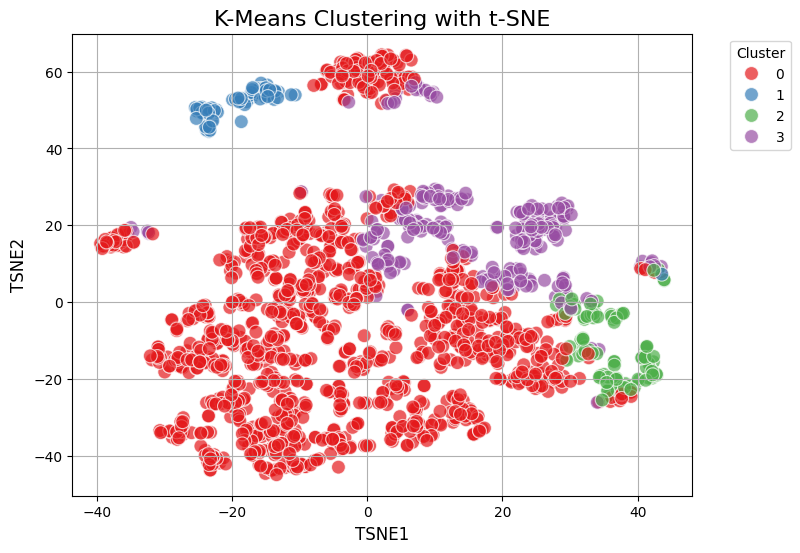

C:\Users\khali\AppData\Local\Temp\ipykernel_9456\579042440.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(1, len(pca.explained_variance_ratio_) + 1), y=pca.explained_variance_ratio_, palette='Blues_d')


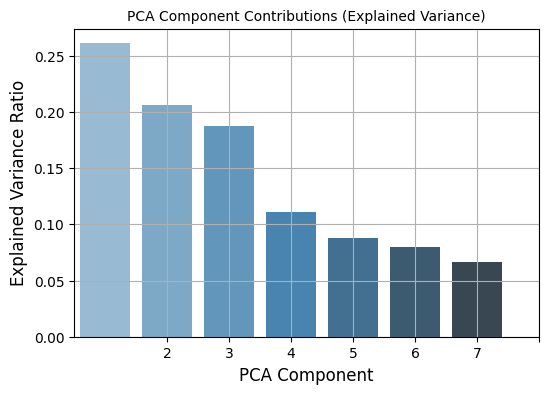

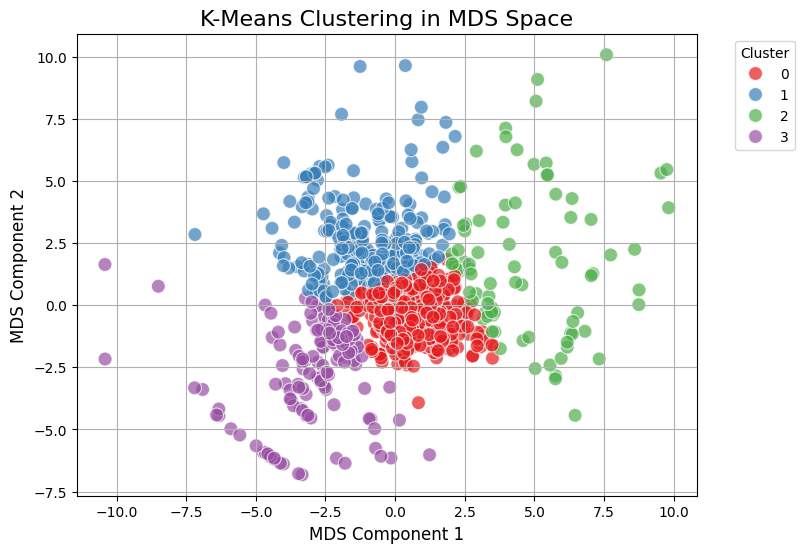

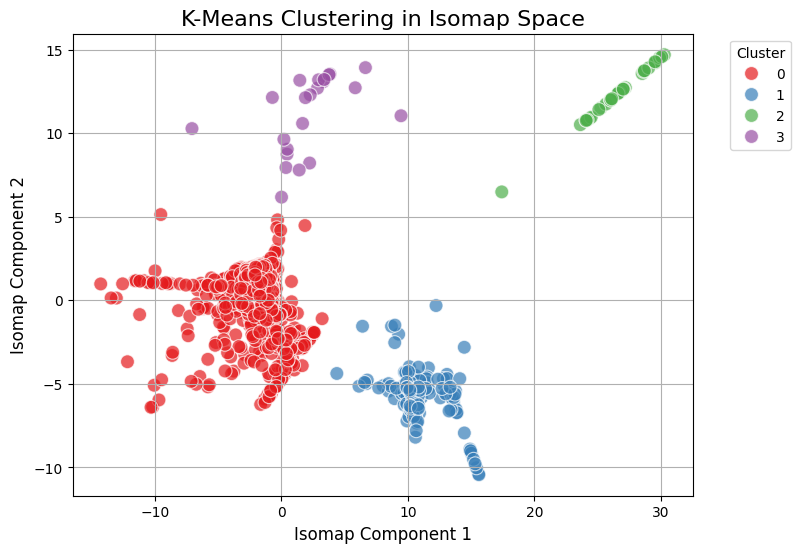

In [166]:
pca = PCA(n_components=0.95)  # Keep 95% of the variance
pca_components = pca.fit_transform(scaled_data)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_components)
df['KMeans_Cluster'] = kmeans_labels
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(pca_components)
df['TSNE1'] = tsne_components[:, 0]
df['TSNE2'] = tsne_components[:, 1]
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=kmeans_labels, palette='Set1', s=100, alpha=0.7)
plt.title('K-Means Clustering in PCA Space', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='KMeans_Cluster', palette='Set1', data=df, s=100, alpha=0.7)
plt.title('K-Means Clustering with t-SNE', fontsize=16)
plt.xlabel('TSNE1', fontsize=12)
plt.ylabel('TSNE2', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
plt.figure(figsize=(6, 4))
sns.barplot(x=np.arange(1, len(pca.explained_variance_ratio_) + 1), y=pca.explained_variance_ratio_, palette='Blues_d')
plt.title('PCA Component Contributions (Explained Variance)', fontsize=10)
plt.xlabel('PCA Component', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()
# from sklearn.manifold import MDS, Isomap
# mds = MDS(n_components=2, random_state=42, dissimilarity='euclidean')
# mds_components = mds.fit_transform(scaled_data)
# isomap = Isomap(n_components=2, n_neighbors=5)
# isomap_components = isomap.fit_transform(scaled_data)
# kmeans_mds = KMeans(n_clusters=4, random_state=42)
# kmeans_labels_mds = kmeans_mds.fit_predict(mds_components)
# kmeans_isomap = KMeans(n_clusters=4, random_state=42)
# kmeans_labels_isomap = kmeans_isomap.fit_predict(isomap_components)
# df['MDS_Cluster'] = kmeans_labels_mds
# df['Isomap_Cluster'] = kmeans_labels_isomap
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=mds_components[:, 0], y=mds_components[:, 1], hue=df['MDS_Cluster'], palette='Set1', s=100, alpha=0.7)
# plt.title('K-Means Clustering in MDS Space', fontsize=16)
# plt.xlabel('MDS Component 1', fontsize=12)
# plt.ylabel('MDS Component 2', fontsize=12)
# plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=isomap_components[:, 0], y=isomap_components[:, 1], hue=df['Isomap_Cluster'], palette='Set1', s=100, alpha=0.7)
# plt.title('K-Means Clustering in Isomap Space', fontsize=16)
# plt.xlabel('Isomap Component 1', fontsize=12)
# plt.ylabel('Isomap Component 2', fontsize=12)
# plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()

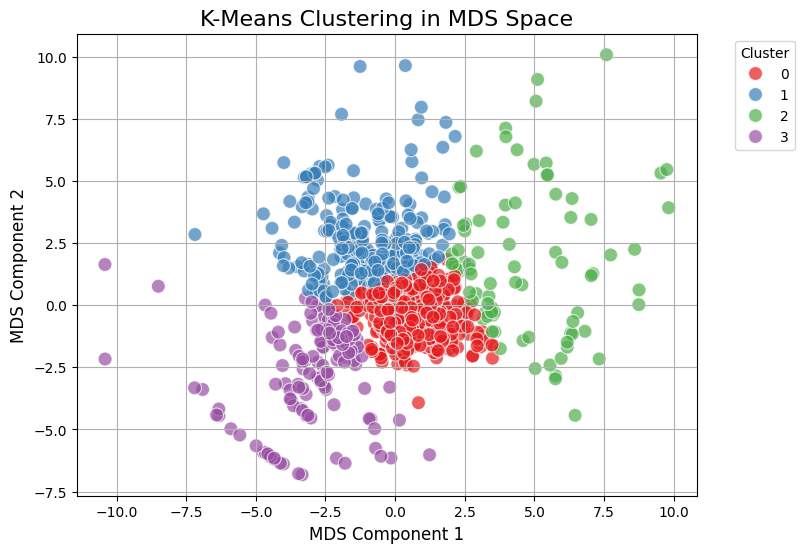

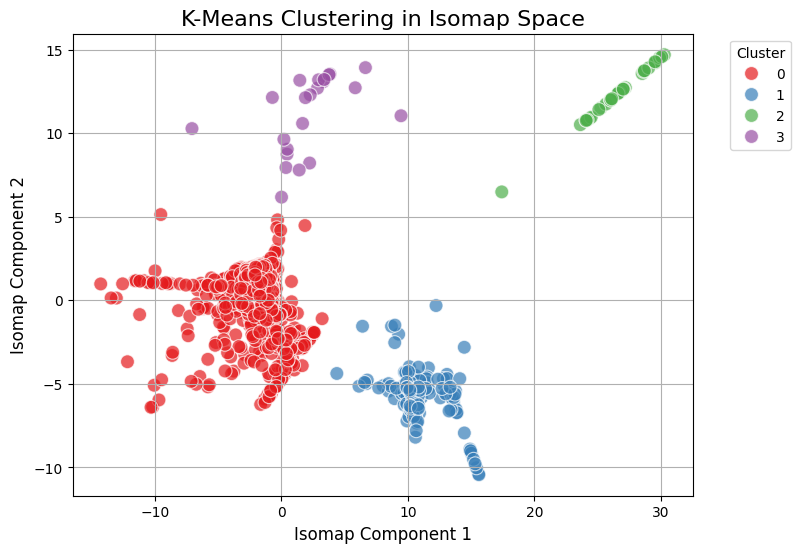

In [172]:
from sklearn.manifold import MDS, Isomap
mds = MDS(n_components=2, random_state=42, dissimilarity='euclidean')
mds_components = mds.fit_transform(scaled_data)
isomap = Isomap(n_components=2, n_neighbors=5)
isomap_components = isomap.fit_transform(scaled_data)
kmeans_mds = KMeans(n_clusters=4, random_state=42)
kmeans_labels_mds = kmeans_mds.fit_predict(mds_components)
kmeans_isomap = KMeans(n_clusters=4, random_state=42)
kmeans_labels_isomap = kmeans_isomap.fit_predict(isomap_components)
df['MDS_Cluster'] = kmeans_labels_mds
df['Isomap_Cluster'] = kmeans_labels_isomap
plt.figure(figsize=(8, 6))
sns.scatterplot(x=mds_components[:, 0], y=mds_components[:, 1], hue=df['MDS_Cluster'], palette='Set1', s=100, alpha=0.7)
plt.title('K-Means Clustering in MDS Space', fontsize=16)
plt.xlabel('MDS Component 1', fontsize=12)
plt.ylabel('MDS Component 2', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(x=isomap_components[:, 0], y=isomap_components[:, 1], hue=df['Isomap_Cluster'], palette='Set1', s=100, alpha=0.7)
plt.title('K-Means Clustering in Isomap Space', fontsize=16)
plt.xlabel('Isomap Component 1', fontsize=12)
plt.ylabel('Isomap Component 2', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

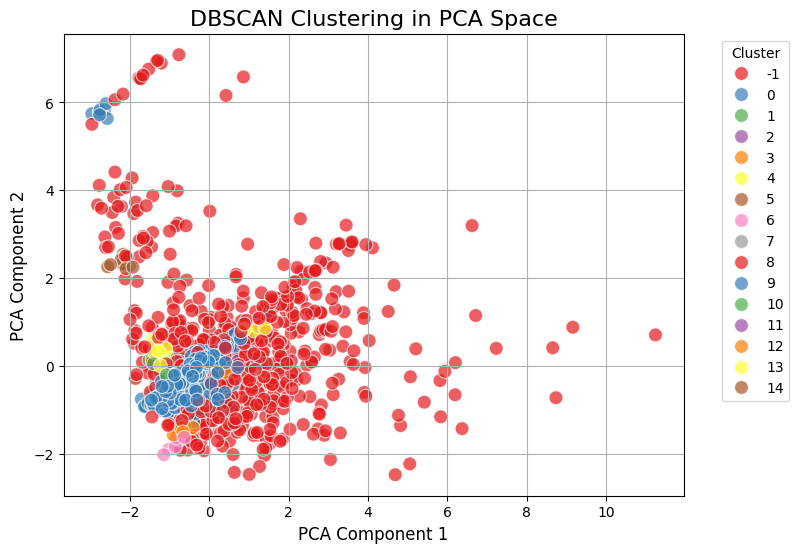

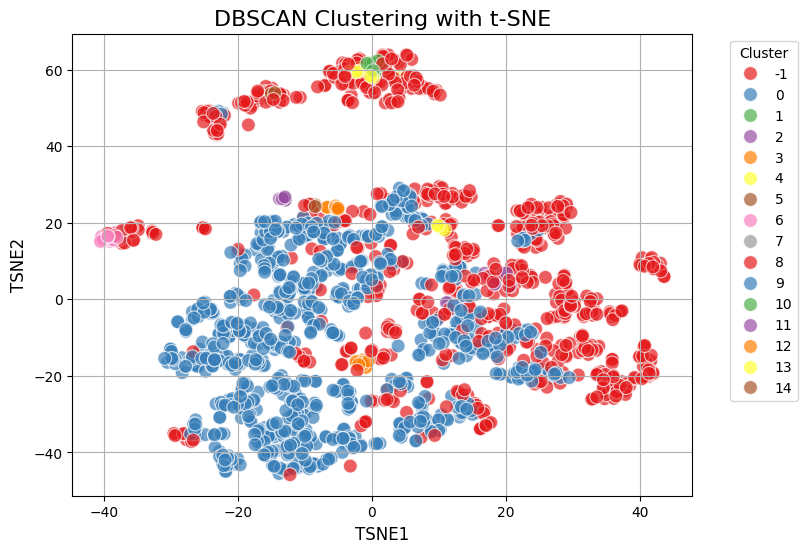

In [227]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
pca_components = pca.fit_transform(scaled_data)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_components)
df['DBSCAN_Cluster'] = dbscan_labels
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(pca_components)
df['TSNE1'] = tsne_components[:, 0]
df['TSNE2'] = tsne_components[:, 1]
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=dbscan_labels, palette='Set1', s=100, alpha=0.7)
plt.title('DBSCAN Clustering in PCA Space', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='DBSCAN_Cluster', palette='Set1', data=df, s=100, alpha=0.7)
plt.title('DBSCAN Clustering with t-SNE', fontsize=16)
plt.xlabel('TSNE1', fontsize=12)
plt.ylabel('TSNE2', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

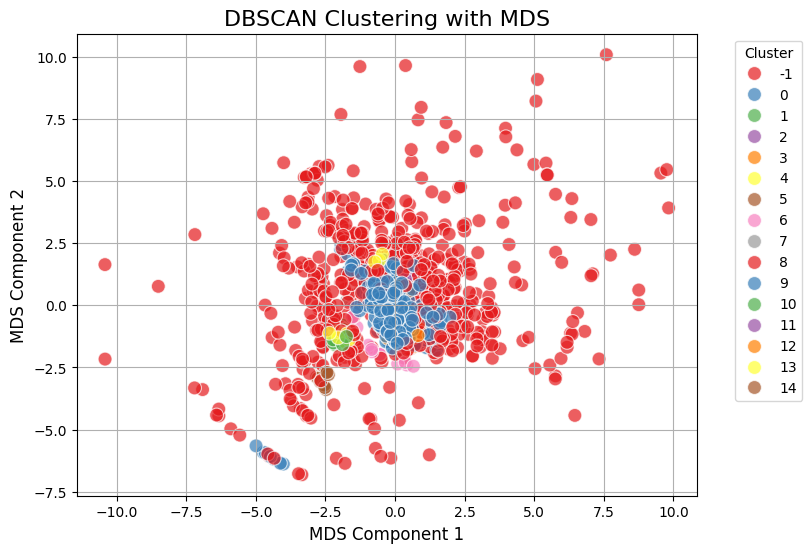

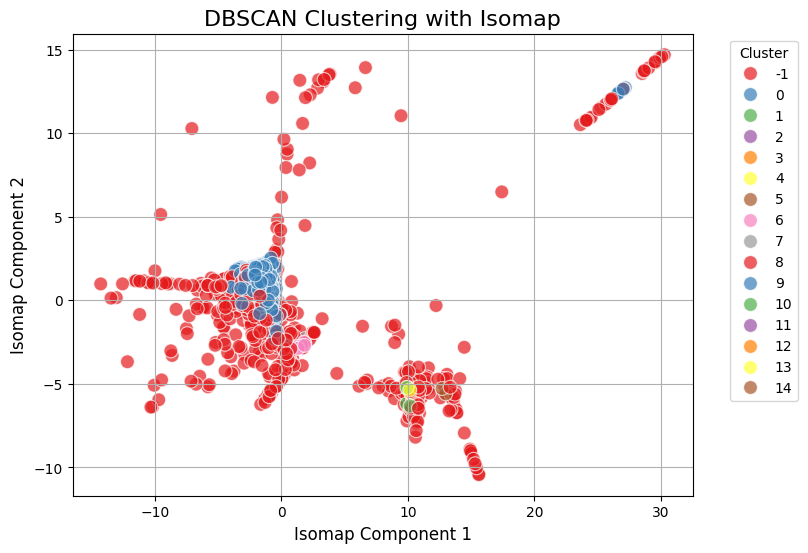

In [231]:
pca = PCA(n_components=0.95)
pca_components = pca.fit_transform(scaled_data)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_components)
df['DBSCAN_Cluster'] = dbscan_labels
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(pca_components)
df['TSNE1'] = tsne_components[:, 0]
df['TSNE2'] = tsne_components[:, 1]
# ========================= MDS =========================
mds = MDS(n_components=2, random_state=42)
mds_components = mds.fit_transform(pca_components)
df['MDS1'] = mds_components[:, 0]
df['MDS2'] = mds_components[:, 1]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MDS1', y='MDS2', hue='DBSCAN_Cluster', palette='Set1', data=df, s=100, alpha=0.7)
plt.title('DBSCAN Clustering with MDS', fontsize=16)
plt.xlabel('MDS Component 1', fontsize=12)
plt.ylabel('MDS Component 2', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
# ========================= Isomap =========================
isomap = Isomap(n_components=2)
isomap_components = isomap.fit_transform(pca_components)
df['Isomap1'] = isomap_components[:, 0]
df['Isomap2'] = isomap_components[:, 1]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Isomap1', y='Isomap2', hue='DBSCAN_Cluster', palette='Set1', data=df, s=100, alpha=0.7)
plt.title('DBSCAN Clustering with Isomap', fontsize=16)
plt.xlabel('Isomap Component 1', fontsize=12)
plt.ylabel('Isomap Component 2', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [174]:
from sklearn.metrics import silhouette_score

# List of dimensionality reduction methods
dim_reductions = {
    "PCA": pca_components,  # Assuming PCA components are already calculated
    "t-SNE": tsne_components,  # Assuming t-SNE components are already calculated
    "MDS": mds_components,  # Assuming MDS components are already calculated
}

# List of clustering algorithms
clustering_algorithms = {
    "K-Means": KMeans(n_clusters=4, random_state=42),
    "GMM": GaussianMixture(n_components=4, random_state=42),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
}

# Function to calculate and print silhouette score
def compute_silhouette_score(X, cluster_labels):
    if len(set(cluster_labels)) > 1:  # Ensure there are multiple clusters
        return silhouette_score(X, cluster_labels)
    else:
        return -1  # Return -1 if only one cluster is found (invalid score)

# Loop through each dimensionality reduction method and clustering algorithm
results = []
for dim_red_name, reduced_data in dim_reductions.items():
    for cluster_name, cluster_algorithm in clustering_algorithms.items():
        if cluster_name == "DBSCAN":  # DBSCAN does not need n_clusters parameter
            cluster_labels = cluster_algorithm.fit_predict(reduced_data)
        else:
            cluster_labels = cluster_algorithm.fit_predict(reduced_data)
        
        # Calculate silhouette score
        silhouette_avg = compute_silhouette_score(reduced_data, cluster_labels)
        
        # Store the results
        results.append((dim_red_name, cluster_name, silhouette_avg))

# Display the results in a readable format
results_df = pd.DataFrame(results, columns=["Dimensionality Reduction", "Clustering Algorithm", "Silhouette Score"])
print(results_df)

  Dimensionality Reduction Clustering Algorithm  Silhouette Score
0                      PCA              K-Means          0.386107
1                      PCA                  GMM          0.022229
2                      PCA               DBSCAN         -0.221876
3                    t-SNE              K-Means          0.455878
4                    t-SNE                  GMM          0.441334
5                    t-SNE               DBSCAN         -0.504649
6                      MDS              K-Means          0.466999
7                      MDS                  GMM          0.276014
8                      MDS               DBSCAN          0.384415


### Clustering Results with Different Dimensionality Reduction Techniques

We applied three different dimensionality reduction techniques—PCA, t-SNE, and MDS—along with three clustering algorithms—K-Means, Gaussian Mixture Models (GMM), and DBSCAN—to analyze our dataset. Here are the key findings:

| Dimensionality Reduction | Clustering Algorithm | Silhouette Score |
|--------------------------|----------------------|------------------|
| PCA                      | K-Means              | 0.3861           |
| PCA                      | GMM                  | 0.0222           |
| PCA                      | DBSCAN               | -0.2219          |
| t-SNE                    | K-Means              | 0.4559           |
| t-SNE                    | GMM                  | 0.4413           |
| t-SNE                    | DBSCAN               | -0.5046          |
| MDS                      | K-Means              | **0.4670**       |
| MDS                      | GMM                  | 0.2760           |
| MDS                      | DBSCAN               | 0.3844           |

### Insights:

- **MDS + K-Means** produced the highest Silhouette Score (0.4670), indicating the best separation of clusters.
- **t-SNE + K-Means** and **MDS + K-Means** were the best performing methods, showing good separation of clusters.
- **DBSCAN** performed poorly with negative scores, particularly with t-SNE and PCA, suggesting it may not be the best clustering method for this dataset.

### Conclusion:
Based on the Silhouette Scores, **MDS + K-Means** is the most effective combination for clustering this dataset, as it provides the best cluster separation. We recommend using this combination for further analysis or model development.


## Conclusion

The analysis of the tech salaries dataset provides a programmer-oriented view of the trends and factors influencing compensation in the technology sector. Key findings include:

### 1. Regional Salary Variations
- Clustering based on geographic data revealed salary disparities across regions, offering programmers insights into the best-paying areas. This is particularly useful for remote workers considering relocation or evaluating offers.

### 2. Experience-Based Trends
- Analysis showed that experience, both general and employer-specific, is a strong determinant of salary levels. Programmers can leverage this information to negotiate pay or plan their career progression strategically.

### 3. Key Factors Influencing Salaries
- PCA and other dimensionality reduction techniques identified critical components driving salary differences. For instance, the combination of experience and location emerged as a dominant factor. Programmers can use this knowledge to focus on skills or certifications that are highly valued in specific regions or companies.

### 4. Career Path Guidance
- The identified clusters can act as benchmarks for programmers at different career stages. Whether you're an entry-level developer or a senior engineer, understanding where you fit within these clusters can guide decisions about skills development and career planning.

### 5. Technology's Impact on Compensation
- The analysis highlights how modern data science techniques can dissect large, complex datasets to reveal trends that are not immediately apparent. For programmers, this not only offers a window into salary dynamics but also serves as a practical application of clustering and dimensionality reduction techniques.

---

## Final Thoughts

This study demonstrates how data science can be harnessed to better understand the landscape of tech salaries, providing programmers with insights into career planning, salary negotiation, and market trends. By applying techniques like PCA, t-SNE, MDS, and clustering, we uncover the hidden structures and patterns in compensation data.

The findings empower programmers to make informed decisions about their careers while showcasing the practical applications of advanced algorithms in solving real-world problems. This project underscores the importance of data-driven approaches in the technology sector and highlights the value of programming skills in navigating and interpreting complex datasets.

### Based on the above analyses, I can concolude that I will continue my research with K-Means algorithm...

# Dimension Reduction Analysis

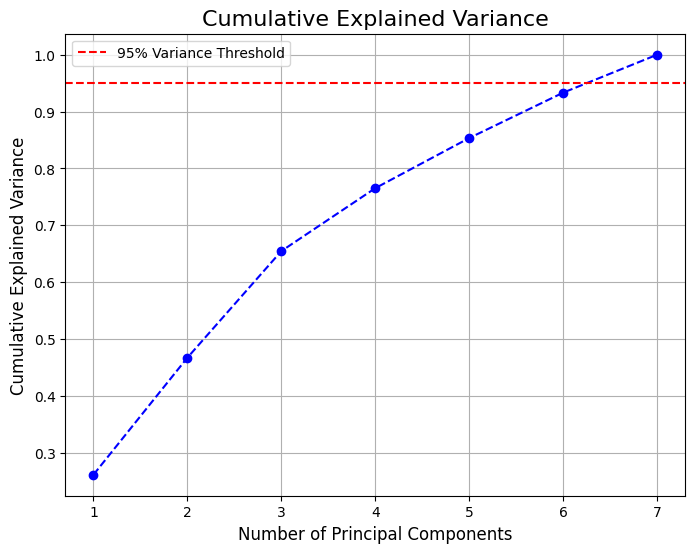

In [67]:
pca = PCA().fit(scaled_data)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.title('Cumulative Explained Variance', fontsize=16)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.show()

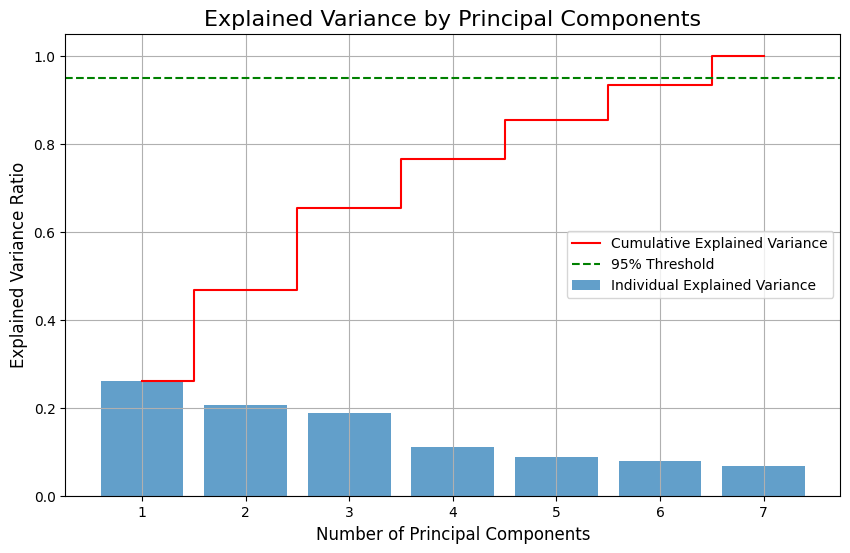

Number of components to retain 95% variance: 7


In [77]:
pca.fit(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Explained Variance', color='red')
plt.axhline(y=0.95, color='green', linestyle='--', label='95% Threshold')
plt.title('Explained Variance by Principal Components', fontsize=16)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.show()
components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components to retain 95% variance: {components_95}')

In [89]:
pca_optimal = PCA(n_components=7)
pca_components = pca_optimal.fit_transform(scaled_data)
print(f"Shape of the reduced dataset: {pca_components.shape}")

Shape of the reduced dataset: (1655, 7)


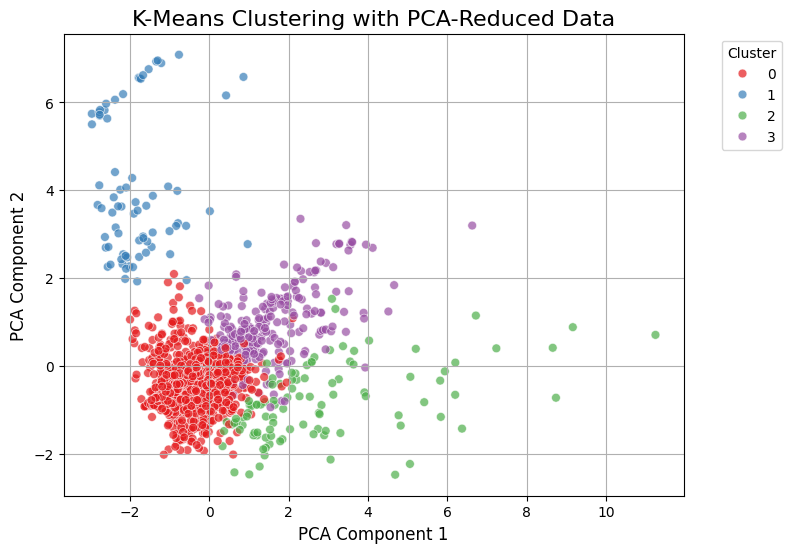

In [121]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_components)
df['Cluster'] = kmeans_labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=kmeans_labels, palette='Set1', s=40, alpha=0.7)
plt.title('K-Means Clustering with PCA-Reduced Data', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [95]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(pca_components, kmeans_labels)
print(f"Silhouette Score for K-Means with PCA: {silhouette_avg:.4f}")

Silhouette Score for K-Means with PCA: 0.3861


#### Previously I was using n_components = 2, now after I checked the optimal number for pca, now it is obvious that it is 7

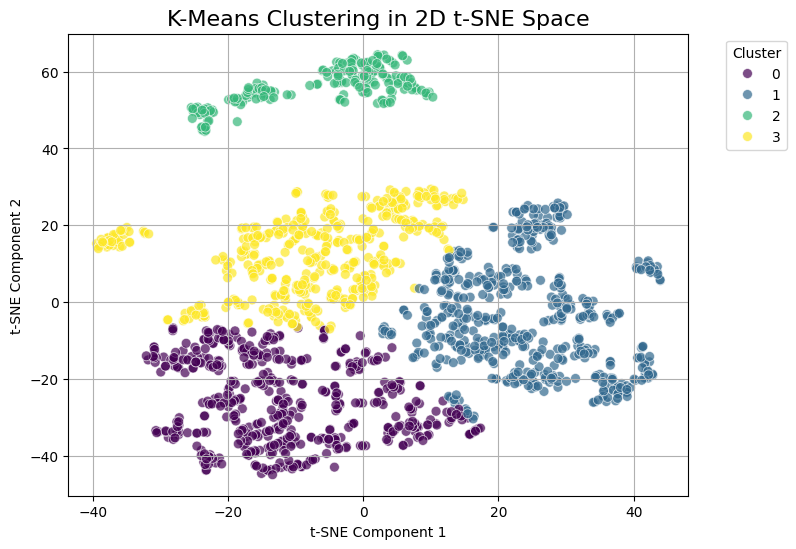

In [119]:
# Run t-SNE with 2 components (standard for visualization)
from sklearn.manifold import TSNE

tsne_2d = TSNE(n_components=2, random_state=42)
tsne_components_2d = tsne_2d.fit_transform(pca_components)

# Apply K-Means on the 2D t-SNE result
kmeans_2d = KMeans(n_clusters=4, random_state=42)
df['Cluster_2D_tSNE'] = kmeans_2d.fit_predict(tsne_components_2d)

# Visualize the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_components_2d[:, 0], y=tsne_components_2d[:, 1], hue=df['Cluster_2D_tSNE'], palette='viridis', s=50, alpha=0.7)
plt.title('K-Means Clustering in 2D t-SNE Space', fontsize=16)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

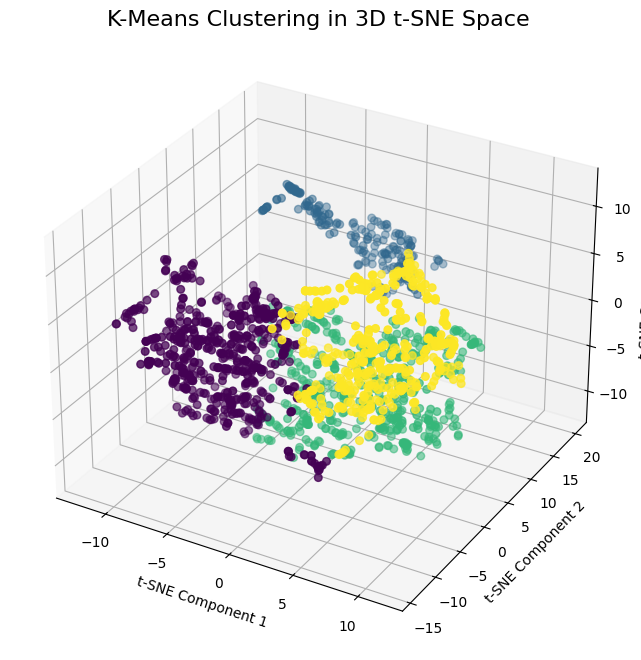

In [125]:
# Run t-SNE with 3 components
tsne_3d = TSNE(n_components=3, random_state=42)
tsne_components_3d = tsne_3d.fit_transform(pca_components)

# Apply K-Means on the 3D t-SNE result
kmeans_3d = KMeans(n_clusters=4, random_state=42)
df['Cluster_3D_tSNE'] = kmeans_3d.fit_predict(tsne_components_3d)

# Visualize the results (for 3D)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_components_3d[:, 0], tsne_components_3d[:, 1], tsne_components_3d[:, 2], c=df['Cluster_3D_tSNE'], cmap='viridis', s=30)
ax.set_title('K-Means Clustering in 3D t-SNE Space', fontsize=16)
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.show()

In [108]:
from sklearn.metrics import silhouette_score

# Silhouette score for 2D t-SNE
silhouette_2d = silhouette_score(tsne_components_2d, df['Cluster_2D_tSNE'])
print(f'Silhouette Score for 2D t-SNE: {silhouette_2d}')

# Silhouette score for 3D t-SNE
silhouette_3d = silhouette_score(tsne_components_3d, df['Cluster_3D_tSNE'])
print(f'Silhouette Score for 3D t-SNE: {silhouette_3d}')

Silhouette Score for 2D t-SNE: 0.45587798953056335
Silhouette Score for 3D t-SNE: 0.3648001253604889


In [110]:
# Try t-SNE with different perplexity values
perplexities = [5, 10, 30, 50, 100]

for p in perplexities:
    tsne = TSNE(n_components=2, perplexity=p, random_state=42)
    tsne_components = tsne.fit_transform(pca_components)
    
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=4, random_state=42)
    cluster_labels = kmeans.fit_predict(tsne_components)
    
    # Calculate silhouette score
    silhouette = silhouette_score(tsne_components, cluster_labels)
    print(f'Silhouette Score for perplexity {p}: {silhouette}')

Silhouette Score for perplexity 5: 0.3639294505119324
Silhouette Score for perplexity 10: 0.370343953371048
Silhouette Score for perplexity 30: 0.45587798953056335
Silhouette Score for perplexity 50: 0.46697521209716797
Silhouette Score for perplexity 100: 0.484469473361969


##### from below plot it is obvious that best preximity is 100, previously i used between 30 and 80

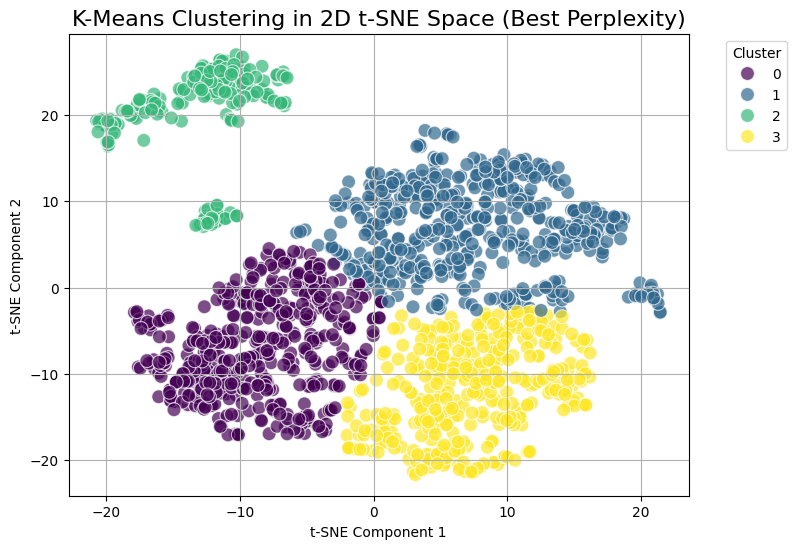

In [112]:
# Apply t-SNE with the best perplexity value (100) and 2 components
tsne_best = TSNE(n_components=2, perplexity=100, random_state=42)
tsne_components_best = tsne_best.fit_transform(pca_components)

# Apply K-Means clustering on the 2D t-SNE result
kmeans_best_tsne = KMeans(n_clusters=4, random_state=42)
df['Cluster_Best_tSNE'] = kmeans_best_tsne.fit_predict(tsne_components_best)

# Visualize the clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_components_best[:, 0], y=tsne_components_best[:, 1], hue=df['Cluster_Best_tSNE'], palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering in 2D t-SNE Space (Best Perplexity)', fontsize=16)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

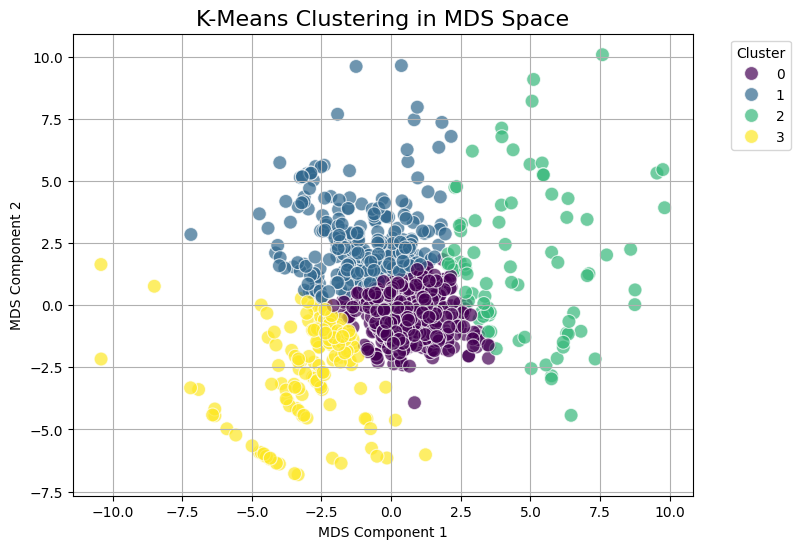

In [130]:
from sklearn.manifold import MDS

# Apply MDS for dimensionality reduction (2 components)
mds = MDS(n_components=2, random_state=42)
mds_components = mds.fit_transform(pca_components)

# Apply K-Means clustering on MDS components
kmeans_mds = KMeans(n_clusters=4, random_state=42)
df['Cluster_MDS'] = kmeans_mds.fit_predict(mds_components)

# Visualize the clustering results in MDS space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=mds_components[:, 0], y=mds_components[:, 1], hue=df['Cluster_MDS'], palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering in MDS Space', fontsize=16)
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [132]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for MDS clustering
silhouette_mds = silhouette_score(mds_components, df['Cluster_MDS'])
print(f"Silhouette Score for MDS: {silhouette_mds}")

Silhouette Score for MDS: 0.4669988806379707


### Difference in Silhouetter score for 3 differet Dimension Reduction Methods

In [139]:
# Print silhouette scores
print("Silhouette Score for MDS: ", silhouette_mds)
print("Silhouette Score for 2D t-SNE: ", silhouette_2d)
print("Silhouette Score for K-Means with PCA: ", silhouette_avg)

Silhouette Score for MDS:  0.4669988806379707
Silhouette Score for 2D t-SNE:  0.455878
Silhouette Score for K-Means with PCA:  0.38610721672656717


## Analyzing the Results

After applying different dimensionality reduction techniques (MDS, t-SNE, and PCA) in combination with K-Means clustering, we evaluate the effectiveness of each method based on the **Silhouette Score**. This score helps us understand the quality of the clustering, with higher values indicating better separation between clusters.

Here are the **Silhouette Scores** for each method:

- **MDS:** 0.467
- **2D t-SNE:** 0.456
- **PCA:** 0.3861

### Interpretation:

- **MDS** provides the highest silhouette score (**0.467**), which suggests that it produces the best separation of clusters in the reduced space. This indicates that **MDS** is the most effective dimensionality reduction method for preserving the structure of the data in a lower-dimensional space.
  
- **t-SNE**, with a silhouette score of **0.456**, also provides a good separation of clusters, though it is slightly less effective than MDS.

- **PCA**, while useful for reducing dimensionality, results in the lowest silhouette score (**0.3861**), indicating that the clustering performance is not as strong as with MDS and t-SNE.

### Conclusion:

Based on the Silhouette Scores, **MDS** is the best method for dimensionality reduction in this particular dataset, as it provides the most well-separated clusters when combined with K-Means clustering. While t-SNE and PCA also produce reasonable results, MDS stands out as the most effective approacring in this dataset.


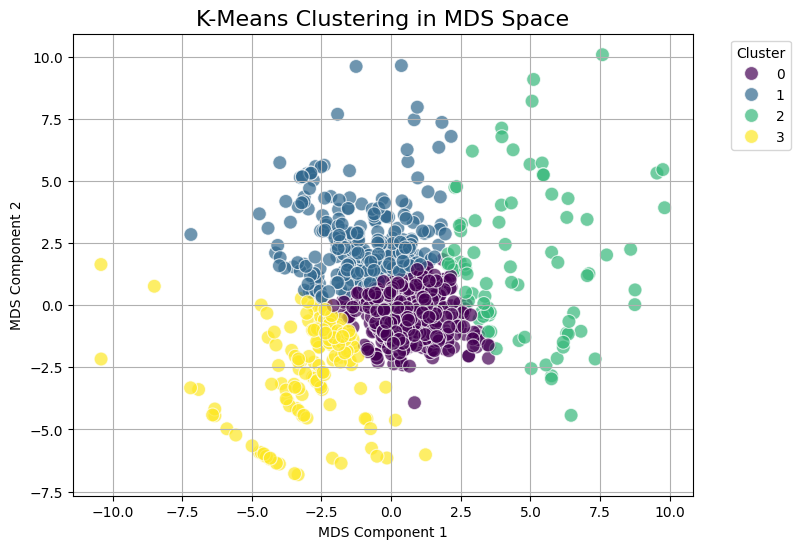

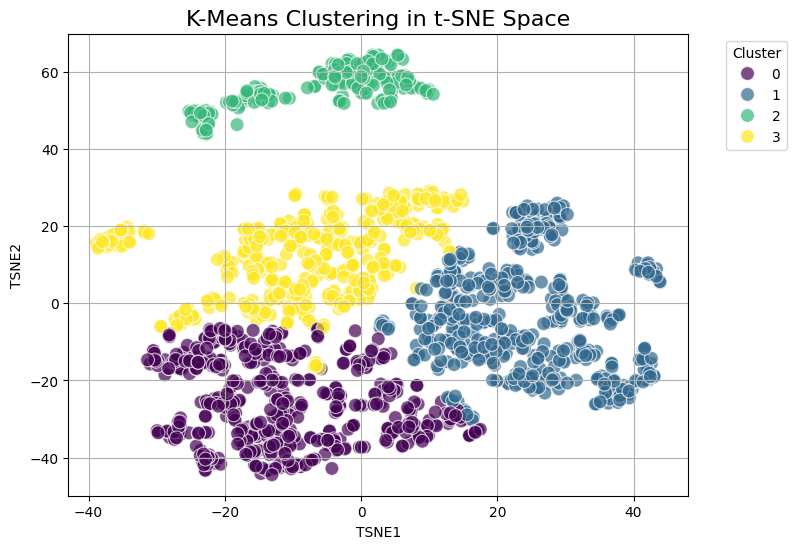

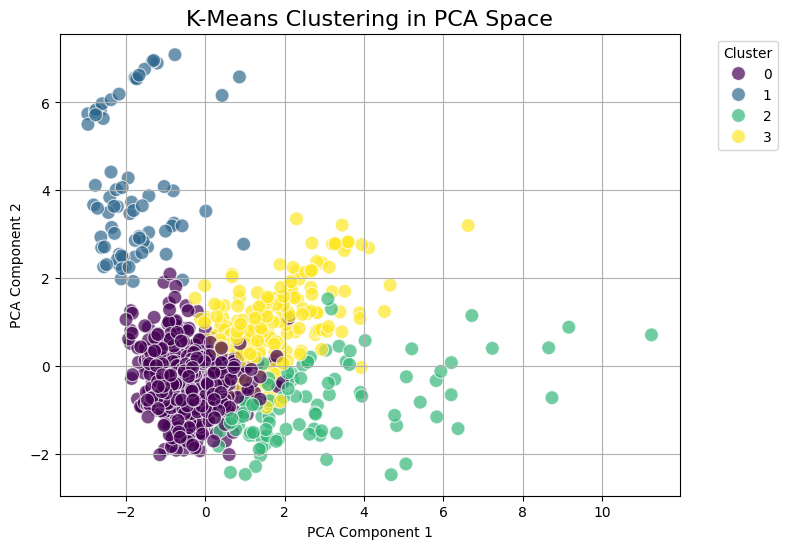

In [148]:
# Visualize the clustering results in MDS space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=mds_components[:, 0], y=mds_components[:, 1], hue=df['Cluster_MDS'], palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering in MDS Space', fontsize=16)
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Visualize the clustering results in t-SNE space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['TSNE1'], y=df['TSNE2'], hue=df['Cluster_2D_tSNE'], palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering in t-SNE Space', fontsize=16)
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Visualize the clustering results in PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering in PCA Space', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()